## Imports and Function Definitions

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import glob
import pymongo
import pickle
from scipy.ndimage import uniform_filter1d
import os
from itertools import zip_longest
from matplotlib.lines import Line2D
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.patches as mpatches

In [2]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import matplotlib.ticker

class FormatScalarFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, fformat="%1.1f", offset=True, mathText=True):
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,
                                                        useMathText=mathText)
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)

In [3]:
def getline(value):
    if value < 0:
        return 'dashed'
#     if value ==0 :
#         return 'dotted'
    if value >= 0:
        return 'solid'
    

In [4]:
def fluctuations(seqs):
    #returns [xlist, ylist]; where x is the distance in l and y is the fluctuation
    maxlen = max(map(len,seqs))
    diff = {i:[] for i in range(1,maxlen)}
    ABnumber = {
        'A': 1,
        'B': -1
    }
    for seq in seqs:
        if seq[-1] == 'c':
            seq = seq[:-1]
        coord = np.cumsum(list(map(lambda x: ABnumber[x], seq)))
        for i in range(len(coord)):
            for j in range(i):
                diff[i-j].append(coord[i]-coord[j])
    rms = {i: np.std(diff[i]) for i in diff}
    return list(zip(*rms.items()))


In [5]:
def findp(p):
    for i in range(len(p)):
        if p[i] >= 0.9:
            index = i
            break
    return index

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Lists contain strings of explored simulation parameters for ordering simulation analysis
allEEAAcase = [['0.75','0.75','0.75','0.75','0.75',
                '0.75','0.75','0.75','0.75','0.75',
                '0.75','0.75','0.75','0.75','0.75',
                '0.75','0.75','0.75','0.75','0.75',
                '0.75','0.75','0.75',
                '0.75','0.75','0.75'],
               ['3.0','3.0','3.0','3.0','3.0',
                '3.0','3.0','3.0','3.0','3.0',
                '3.0','3.0','3.0','3.0','3.0',
                '3.0','3.0', '3.0','3.0','3.0',
                '3.0','3.0','3.0',
                '3.0','3.0','3.0'],
               ['3.0','3.0','3.0','3.0','3.0',
                '3.0','3.0','3.0','3.0','3.0',
                '3.0','3.0','3.0','3.0','3.0',
                '3.0','3.0','3.0','3.0','3.0',
                '3.0','3.0','3.0',
                '3.0','3.0','3.0'],
               ['0.0','0.0','0.0','0.0','0.0',
                '0.0','0.0','0.0', '0.0','0.0',
                '0.0','0.0','0.0','0.0','0.0',
                '0.0','0.0','0.0','0.0','0.0',
                '0.0','0.0','0.0','0.0','0.0','0.0']]
allEEBBcase = [['0.75','0.75','0.75','0.75','0.75','0.75',
               '0.75','0.75','0.75','0.75','0.75','0.75'
               ,'0.75','0.75','0.75','0.75','0.75','0.75',
                '0.75','0.75','0.75','0.75'
               ,'0.75', '0.75','0.75','0.75'],['3.0','3.0','3.0','3.0','3.0','3.0','3.0',
                '3.0','3.0','3.0',
        '3.0','3.0','3.0','3.0','3.0','3.0','3.0','3.0','3.0','3.0',
        '3.0','3.0','3.0','3.0','3.0','3.0'],['3.0','3.0','3.0','3.0','3.0','3.0','3.0',
                '3.0','3.0','3.0',
        '3.0','3.0','3.0','3.0','3.0','3.0','3.0','3.0','3.0','3.0',
        '3.0','3.0','3.0','3.0','3.0','3.0'],['0.0','0.0','0.0','0.0','0.0',
                                             '0.0','0.0','0.0','0.0','0.0',
                                             '0.0','0.0','0.0','0.0','0.0','0.0','0.0','0.0',
                                             '0.0','0.0','0.0','0.0','0.0','0.0','0.0','0.0']]
allEEABcase = [['0.75','0.75','0.75','0.75','0.75','0.75','0.75','0.75','0.75',
               '0.75','0.75','0.75','0.75','0.75','0.75',
                '0.75','0.75','0.75'
               ,'0.75','0.75','0.75','0.75','0.75','0.75','0.75'
               ,'0.75'],['3.0','3.0','3.0','3.0','3.0','3.0','3.0',
        '3.0','3.0','3.0','3.0','3.0','3.0','3.0',
        '3.0','3.0','3.0','3.0','3.0','3.0','3.0','3.0',
                '3.0','3.0','3.0','3.0'],['0.0','0.0','0.0','0.0','0.0',
                                             '0.0','0.0','0.0','0.0','0.0',
                                             '0.0','0.0','0.0','0.0','0.0','0.0','0.0','0.0',
                                             '0.0','0.0','0.0','0.0','0.0','0.0','0.0','0.0'],
               ['3.0','3.0','3.0','3.0','3.0',
                '3.0','3.0','3.0','3.0','3.0',
                '3.0','3.0','3.0','3.0','3.0',
                '3.0','3.0','3.0','3.0','3.0'
               , '3.0','3.0','3.0' , '3.0','3.0','3.0']]              
allrbAAcase = [['9.0','9.0','9.0','9.0','9.0','9.0','9.0',
                '10.5','12.0',
                '6.0','6.0','6.0','6.0','6.0',
                
                '7.5','6.0','4.5','3.0','1.5',
        
                 '4.5','3.0','1.5','0.0','0.0','0.0','0.0'
        ],['9.0','9.0','9.0','9.0','9.0','9.0','9.0',
                '10.5','12.0',
                '6.0','6.0','6.0','6.0','6.0',
                
                '7.5','6.0','4.5','3.0','1.5',
        
                 '4.5','3.0','1.5','0.0','0.0','0.0','0.0'
        ]
        ,['9.0','9.0','9.0','9.0','9.0','9.0','9.0',
                '10.5','12.0',
                '6.0','6.0','6.0','6.0','6.0',
                
                '7.5','6.0','4.5','3.0','1.5',
        
                 '4.5','3.0','1.5','0.0','0.0','0.0','0.0'
        ],['9.0','9.0','9.0','9.0','9.0','9.0','9.0',
                '10.5','12.0',
                '6.0','6.0','6.0','6.0','6.0',
                
                '7.5','6.0','4.5','3.0','1.5',
        
                 '4.5','3.0','1.5','0.0','0.0','0.0','0.0'
        ]]
allrbBBcase = [['9.0','9.0','9.0','9.0','9.0','9.0','9.0',
                '10.5','12.0',
                '6.0','6.0','6.0','6.0','6.0',
                
                '7.5','6.0','4.5','3.0','1.5',
        
                 '4.5','3.0','1.5','0.0','0.0','0.0','0.0'
        ],['9.0','9.0','9.0','9.0','9.0','9.0','9.0',
                '10.5','12.0',
                '6.0','6.0','6.0','6.0','6.0',
                
                '7.5','6.0','4.5','3.0','1.5',
        
                 '4.5','3.0','1.5','0.0','0.0','0.0','0.0'
        ],['9.0','9.0','9.0','9.0','9.0','9.0','9.0',
                '10.5','12.0',
                '6.0','6.0','6.0','6.0','6.0',
                
                '7.5','6.0','4.5','3.0','1.5',
        
                 '4.5','3.0','1.5','0.0','0.0','0.0','0.0'
        ],['9.0','9.0','9.0','9.0','9.0','9.0','9.0',
                '10.5','12.0',
                '6.0','6.0','6.0','6.0','6.0',
                
                '7.5','6.0','4.5','3.0','1.5',
        
                 '4.5','3.0','1.5','0.0','0.0','0.0','0.0'
        ]]
allrbABcase = [['9.0','7.5','6.0','4.5','3.0','1.5','0.0','0.0','0.0','6.0',
        '4.5','3.0','1.5','0.0',
                '9.0'
        ,'9.0','9.0','9.0','9.0',
                '6.0','6.0','6.0'
         ,'6.0','9.0','10.5','12.0'
        ],['9.0','7.5','6.0','4.5','3.0','1.5','0.0','0.0','0.0','6.0',
        '4.5','3.0','1.5','0.0',
                '9.0'
        ,'9.0','9.0','9.0','9.0',
                '6.0','6.0','6.0'
         ,'6.0','9.0','10.5','12.0'
        ],['9.0','7.5','6.0','4.5','3.0','1.5','0.0','0.0','0.0','6.0',
        '4.5','3.0','1.5','0.0',
                '9.0'
        ,'9.0','9.0','9.0','9.0',
                '6.0','6.0','6.0'
         ,'6.0','9.0','10.5','12.0'
        ],['9.0','7.5','6.0','4.5','3.0','1.5','0.0','0.0','0.0','6.0',
        '4.5','3.0','1.5','0.0',
                '9.0'
        ,'9.0','9.0','9.0','9.0',
                '6.0','6.0','6.0'
         ,'6.0','9.0','10.5','12.0'
        ]]

colors = {0.5:'lightcoral',1:'indianred',1.5:'orangered',2:'red',2.5:'firebrick',
          -0.5:'palegreen',-1.5:'limegreen',-2.5:'darkgreen'
         ,-1:'lightgreen',-2.0:'mediumseagreen',0:'rosybrown'
         }

colors2 = {0.5:'lightsteelblue',1:'cornflowerblue',1.5:'royalblue',2:'blue',2.5:'darkblue'
           ,-0.5:'thistle',-1:'violet',-1.5:'mediumorchid',-2:'darkorchid',-2.5:'mediumpurple',0.0:'powderblue'
           }

Ea_constant = 5.309973197444597 #Value from activation energy calculation in "copoly5_activation_energy.ipynb"

## Figure 2

In [8]:
#Colorbar
allexpE = []
for i in range(len(allrbAAcase[0])):
    EAA = float(allrbAAcase[0][i])/3
    EAB = float(allrbABcase[0][i])/3
    e = np.exp(-EAA-Ea_constant)+np.exp(-EAB-Ea_constant)
    if e not in allexpE:
        allexpE.append(e)
allexpE=sorted(allexpE)

bottom = cm.get_cmap('Reds',128)
colorbar = cm.get_cmap('gist_stern',128)

newcolors = np.vstack((bottom(np.linspace(0.5,1.0,56 )),(colorbar(np.linspace(0.2,0.8, 128)))))
                       
                      
                    

colorbar  = ListedColormap(newcolors, name='OrangeBlue')                    

                    

                     
                     

vmin = 0
vmax = 5e-3

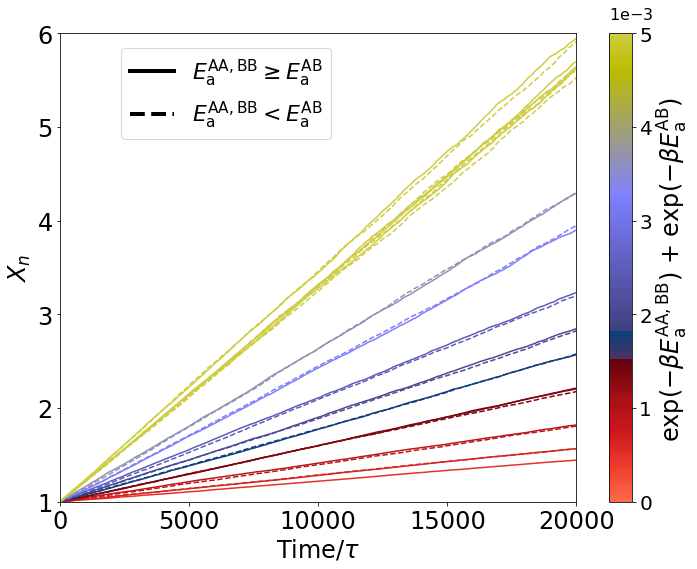

In [9]:
#Figure 2a
from scipy import stats

dashcolor = ['springgreen','green','darkgreen']
solidcolor = ['thistle','violet','mediumorchid','darkorchid','mediumpurple','rebeccapurple']


colors = {0.5:'lightcoral',1:'indianred',1.5:'orangered',2:'red',2.5:'firebrick',
          -0.5:'palegreen',-1.5:'limegreen',-2.5:'darkgreen'
         ,-1:'lightgreen',-2.0:'mediumseagreen',0:'rosybrown'
         }

colors2 = {0.5:'lightsteelblue',1:'cornflowerblue',1.5:'royalblue',2:'blue',2.5:'darkblue'
           ,-0.5:'thistle',-1:'violet',-1.5:'mediumorchid',-2:'darkorchid',-2.5:'mediumpurple',0.0:'powderblue'
           }
c = 0   
fig,ax = plt.subplots(figsize=(10,8))

barwidth = 0.5
x_chain = np.linspace(0,100,101)

chainstiff = ['flex']
shape = '<'
figlabel = ['a','b','c','d']

allA = []
Avalue = 0.0004383093009275185

i =0 
allslope = []
allsum = []
allsum2 = []
allslope2 = []
allminus = []
trials = 3
allAA = []
density = 7200/(50*50*50)
allv = []
allee= []
for e in range(len(allrbAAcase[0])):
    allXn = []
            
            
    alltime = []
    for trial in range(trials):
            #print(len(allXn))
            
           
            Ea = e
            
            
            
                
      
            simname = '220121_copoly_%sepsAA_%sepsAB_%sepsBB_%srbAA_%srbBB_%srbAB_%s-%i'%(allEEAAcase[i][e],
                                                                                              allEEABcase[i][e],
                                                                                               allEEBBcase[i][e],
                                                                                               allrbAAcase[i][Ea],
                                                                                             allrbBBcase[i][Ea],
                                                                                             allrbABcase[i][Ea],
                                                                                             chainstiff[c],trial+1)
        
                                                                                         
            
                    
            DeltaE = (float (allrbAAcase[i][Ea]) - float(allrbABcase[i][Ea]))/3
                
                
                
            with open('./alljarfile/'+simname+'_extent.pickle','rb') as f1:
                p = pickle.load(f1)
            with open('./alljarfile/'+simname+'_tstep.pickle','rb') as f1:
                tstep = pickle.load(f1)
                alltime.append(tstep)
            with open('./alljarfile/'+simname+'_probs.pickle','rb') as f1:
                probs = pickle.load(f1)
               
            with open('./alljarfile/'+simname+'_DOP.pickle','rb') as f1:
                Xn = pickle.load(f1)
                allXn.append(Xn)
                
    Xn = np.nanmean(np.array(list(zip_longest(*allXn)),dtype = float),axis = 1) 
    tstep = np.nanmean(np.array(list(zip_longest(*alltime)),dtype = float),axis = 1) 

    EAA = float(allrbAAcase[i][Ea])/3 + Ea_constant
    EAB = float(allrbABcase[i][Ea])/3 + Ea_constant
    e = np.exp(-EAA)+np.exp(-EAB)
    allee.append(e)
                
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(tstep/1000,Xn)
    #print(std_err)
                
                    
                
    allsum.append((np.exp(-EAA) + np.exp(-EAB)))
    A = (slope/density)/((np.exp(-EAA) + np.exp(-EAB)))
    
    
    allminus.append(EAA - EAB)
                
    allslope.append(slope)
    allAA.append(A)
    
    
                
                    
    if DeltaE >= 0:                      
        ax.plot(tstep/1000,Xn,color = colorbar((e-vmin)/(vmax-vmin)),linestyle = 'solid')
    else: 
        ax.plot(tstep/1000,Xn,color = colorbar((e-vmin)/(vmax-vmin)),linestyle = 'dashed')
            
                  
                
        
                        
   
    
    ax.set_xticks([0,5000,10000,15000,20000])
    ax.set_ylabel('$X_n$',fontsize = 24)
    ax.set_xlabel('Time/$\u03C4$',fontsize = 24)
    ax.set_yticks([1,2,3,4,5,6])




    ax.set_xlim((0,20000))
    ax.set_ylim((1,6))
                
    ax.tick_params(axis='both', labelsize=24)
                

norm = matplotlib.colors.Normalize(vmin = vmin, vmax = vmax)
sm = plt.cm.ScalarMappable(norm=norm,cmap=colorbar)
sm.set_array([])
ticks = np.linspace(vmin,vmax,3)

cb = fig.colorbar(sm) 


fmt = FormatScalarFormatter("%.1f")
cb.set_label(label = 'exp($-\u03B2 E_\mathrm{a}^\mathrm{AA,BB}$) + exp($-\u03B2 E_\mathrm{a}^\mathrm{AB}$) ', size=24)
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
cb.ax.yaxis.get_offset_text().set_visible(False)
cb.ax.text(0.00,5.15e-3, "1e$-$3", size=16)
cb.ax.tick_params(labelsize=20)

line = Line2D([], [], linewidth = 4, linestyle='solid',label = '$E_\mathrm{a}^\mathrm{AA,BB} \geq E_\mathrm{a}^\mathrm{AB}$', color = 'black')
line2 = Line2D([], [], linewidth = 4, linestyle='dashed',label = '$E_\mathrm{a}^\mathrm{AA,BB} < E_\mathrm{a}^\mathrm{AB}$', color = 'black')

fig.legend(handles = [line,line2], fontsize = 22, bbox_to_anchor=(0.48,0.93))



fig.tight_layout()

# print(np.mean(allA),np.std(allA))

#fig.savefig('CalculateXnslope.png',bbox_inches='tight', dpi = 300)   
                   


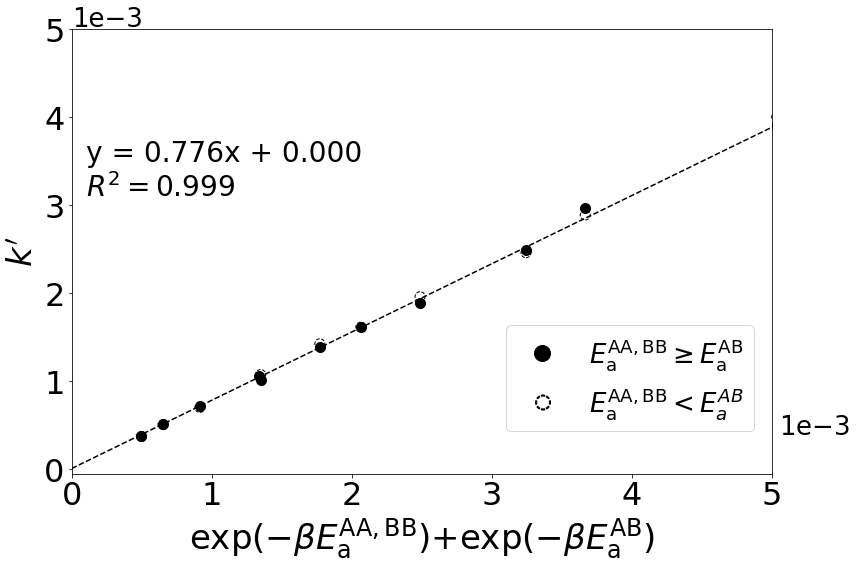

In [10]:
#Figure 2b
figix1,axin1 = plt.subplots(figsize = (12,8)) 
density = 7200/(50*50*50)
kprime = np.array(allslope)/(density)

sumexplot = np.linspace(0,5,100)
axin1.scatter(allsum[i],kprime[i],color = 'black', s = 100, linestyle = 'solid', facecolor = 'black')
for i in range(len(allsum)):
    
    if allminus[i] >= 0:
               
        axin1.scatter(allsum[i],kprime[i],color = 'black', s = 100, linestyle = 'solid', facecolor = 'black')
    else:
        axin1.scatter(allsum[i],kprime[i],color = 'black', s = 100, linestyle = 'dashed' 
                      , facecolor = 'None')
m, b, r_value, p_value, std_err = stats.linregress(allsum,kprime)
#print('std', std_err)

line = Line2D([], [], 
              markersize=16, linestyle='None',color = 'black', 
              markerfacecolor = 'black',
              label = '$E_\mathrm{a}^\mathrm{AA,BB} \geq E_\mathrm{a}^\mathrm{AB}$',
             marker ='o')
line2 = Line2D([], [], 
              markersize=16, linestyle='None', 
              
              label = '$E_\mathrm{a}^\mathrm{AA,BB} < E_a^{AB}$',
              marker='$\u25CC$', markeredgecolor='black')
marker = plt.scatter([], [], linewidth=2, edgecolor='black', s=75,
                     c='yellow', linestyle='dotted')
marker.remove()

figix1.legend(handles = [line,line2], fontsize = 26,bbox_to_anchor=(0.892,0.45))
axin1.text(0.0001,0.0031,'$R^2 = %.3f$'%r_value, fontsize = 28)
axin1.text(0.0001,0.0035,'y = %.3fx + %.3f'%(m,b), fontsize = 28)
axin1.plot(sumexplot,np.array(sumexplot)*m +b, color = 'black', linestyle = 'dashed')
axin1.tick_params(axis='both', labelsize=32)



axin1.yaxis.offsetText.set_fontsize(26)

axin1.xaxis.offsetText.set_fontsize(26)

axin1.xaxis.get_offset_text().set_visible(False)
axin1.text(5.05e-3,0.4e-3, "1e$-$3", size=26)


axin1.set_ylim([-0.05e-3,5e-3])
axin1.set_xlim([0,5e-3])
axin1.ticklabel_format(style='sci', axis='both', scilimits = (0,0))

axin1.set_ylabel("$k^{\prime}$", fontsize = 34)
axin1.set_xlabel("exp($-\u03B2 E_\mathrm{a}^\mathrm{AA,BB}$)+exp($-\u03B2 E_\mathrm{a}^\mathrm{AB}$)", fontsize = 34)


 
figix1.tight_layout()
#figix1.savefig('slopeXn.png',bbox_inches='tight', dpi = 300)
#print(b)

## Figure 3

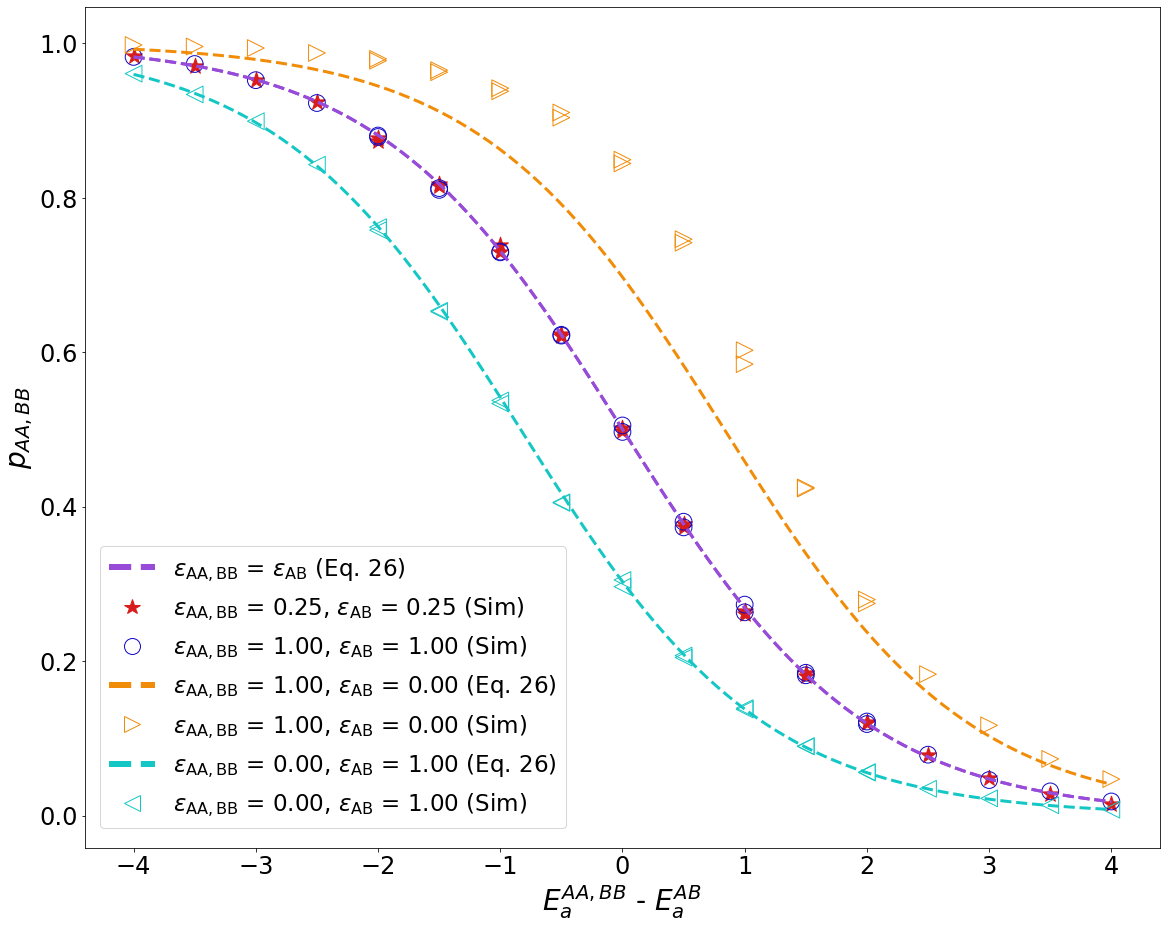

In [11]:
#Fig 3:
fig,ax = plt.subplots(figsize=(16,12.8))

barwidth = 0.5
x_chain = np.linspace(0,100,101)

chainstiff = ['flex']
shape = ['*','o','>','<']
figlabel = ['a','b','c','d']
color3 = ['#D81B1B','#110AC5','#F18C09','#14C7C4']

trials = 3

everyp = []
for c in range(len(chainstiff)):  
    
    for i in range(len(allEEAAcase)):#4 attraction case
        connectdelta = []
        connectp = []
        
        if i == 0 or i == 1:
            
            color = '#974BD8'
            alpha = 1
        if i == 2:
            a = 2.3017357790079904
            alpha = a
            color = color3[i]
            
        if i == 3:
            a = 2.3017357790079904
            alpha = 1/a
            color = color3[i]
        
        
        
        DeltaE2 = np.linspace(-4,4,100)
        eAA = float(allEEAAcase[i][0])/3
        eAB = float(allEEABcase[i][0])/3
        predictedp = (alpha*(np.exp(-DeltaE2)))/(alpha*np.exp(-DeltaE2)+1)
        
        if  i == 2:
            blahy = np.copy(predictedp)
            blahx = np.copy(DeltaE2)
            blah2x = []
            blah2y = []
        
     
        ax.plot(np.array(DeltaE2),predictedp, linestyle = 'dashed', color = color, linewidth = 3)  

            
        for e in range(len(allEEAAcase[i])):
            Ea = e
            allprobs = []    
            for trial in range(trials) : 
                simname = '220121_copoly_%sepsAA_%sepsAB_%sepsBB_%srbAA_%srbBB_%srbAB_%s-%i'%(allEEAAcase[i][e],
                                                                                              allEEABcase[i][e],
                                                                                               allEEBBcase[i][e],
                                                                                               allrbAAcase[i][Ea],
                                                                                             allrbBBcase[i][Ea],
                                                                                             allrbABcase[i][Ea],
                                                                                             chainstiff[c], trial+1)
            
                
                                                                                    
                DeltaE = (float (allrbAAcase[i][Ea]) - float(allrbABcase[i][Ea]))/3
            
            
                
                
                
                with open('./alljarfile/'+simname+'_extent.pickle','rb') as f1:
                    p = pickle.load(f1)
                    index = findp(p)
                    everyp.append(p[index])
                    
                with open('./alljarfile/'+simname+'_tstep.pickle','rb') as f1:
                    tstep = pickle.load(f1)
                with open('./alljarfile/'+simname+'_probs.pickle','rb') as f1:
                    probseach = pickle.load(f1)
                    allprobs.append(probseach[0][index]+probseach[1][index])
                    

                with open('./alljarfile/'+simname+'_DOP.pickle','rb') as f1:
                    DOP = pickle.load(f1)
            probs=np.mean(allprobs)
            

            if i == 2:
                blah2y.append(probs)
                blah2x.append(DeltaE)
                
            if chainstiff[c] == 'flex':
                
               
                if i != 0:
                            ax.scatter(DeltaE,probs,facecolor = 'None',edgecolor = color3[i],marker = shape[i], s = 280,
                                      label = '$E_{a}^{AA,BB}$ = %.2f, $E_{a}^{AB}$ = %.2f'%(float(allrbAAcase[i][Ea])/3,
                                                                                       float(allrbABcase[i][Ea])/3))
                else:
                     ax.scatter(DeltaE,probs,color = color3[i],marker = shape[i], s = 280,
                                  label = '$E_{a}^{AA,BB}$ = %.2f, $E_{a}^{AB}$ = %.2f'%(float(allrbAAcase[i][Ea])/3,
                                                                                       float(allrbABcase[i][Ea])/3))
                            
                            
                            
    
ax.set_ylabel('$p_{AA,BB}$',fontsize = 28)

ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xlabel('$E_{a}^{AA,BB}$ - $E_{a}^{AB}$ ',fontsize = 28)



fig.tight_layout() 
handle,labels = ax.get_legend_handles_labels()
handle = handle[:20]
labels = labels[:20]
labels2 = []

labels2 += ['$\epsilon_\mathrm{AA,BB}$ = $\epsilon_\mathrm{AB}$ (Eq. 26)']
labels2 += [r'$\epsilon_{\rm AA,BB}$ = %.2f, $\epsilon_{\rm AB}$ = %.2f (Sim)'%(float(allEEAAcase[0][0])/3,float(allEEABcase[0][0])/3)]
labels2 += [r'$\epsilon_{\rm AA,BB}$ = %.2f, $\epsilon_{\rm AB}$ = %.2f (Sim)'%(float(allEEAAcase[1][0])/3,float(allEEABcase[1][0])/3)]
labels2 += [r'$\epsilon_{\rm AA,BB}$ = %.2f, $\epsilon_{\rm AB}$ = %.2f (Eq. 26)'%(float(allEEAAcase[2][0])/3,float(allEEABcase[2][0])/3)]
labels2 += [r'$\epsilon_{\rm AA,BB}$ = %.2f, $\epsilon_{\rm AB}$ = %.2f (Sim)'%(float(allEEAAcase[2][0])/3,float(allEEABcase[2][0])/3)]
labels2 += [r'$\epsilon_{\rm AA,BB}$ = %.2f, $\epsilon_{\rm AB}$ = %.2f (Eq. 26)'%(float(allEEAAcase[3][0])/3,float(allEEABcase[3][0])/3)]
labels2 += [r'$\epsilon_{\rm AA,BB}$ = %.2f, $\epsilon_{\rm AB}$ = %.2f (Sim)'%(float(allEEAAcase[3][0])/3,float(allEEABcase[3][0])/3)]


colorlabel = ['rosybrown','lightcoral','indianred','orangered','red','firebrick',
              'powderblue','lightsteelblue','cornflowerblue','royalblue','blue',
             'palegreen','limegreen','darkgreen' ,'lightgreen','mediumseagreen',
              'thistle','violet','mediumorchid','darkorchid'
             ]
         

labelline = []
 
for i in range(len(colorlabel)):
    
    labelline.append(Line2D([], [], color=colorlabel[i], linewidth = 6, linestyle='solid',label = labels[i]))
    
labelline2 = []

for i in range(len(allrbAAcase)):
    if i == 0: 
        labelline2.append(Line2D([], [], color='#974BD8', linestyle='dashed',linewidth = 6))
        
        labelline2.append(Line2D([], [], color = color3[i], markersize=16, linestyle='None', markerfacecolor = color3[i],marker = shape[i]))
    if i == 1: 
        labelline2.append(Line2D([], [], color = color3[i], markersize=16, linestyle='None', markerfacecolor = 'None',marker = shape[i]))
        
    if i == 2 or i == 3:
        labelline2.append(Line2D([], [], color=color3[i], linestyle='dashed',linewidth = 6))
        
        labelline2.append(Line2D([], [], color = color3[i], markersize=16, linestyle='None', markerfacecolor = 'None',marker = shape[i]))


fig.legend(labelline2, labels2,ncol = 1,prop={'size': 23}, loc = 6, bbox_to_anchor= (0.06,0.25))
 

ax.set_xticks([-4,-3.0,-2.0,-1,0,1.0,2.0,3.0,4.0])
ax.tick_params(axis='both', labelsize=24 )
#fig.savefig('Allbonding_combine_fitallline.png',bbox_inches='tight', dpi = 300)  
  

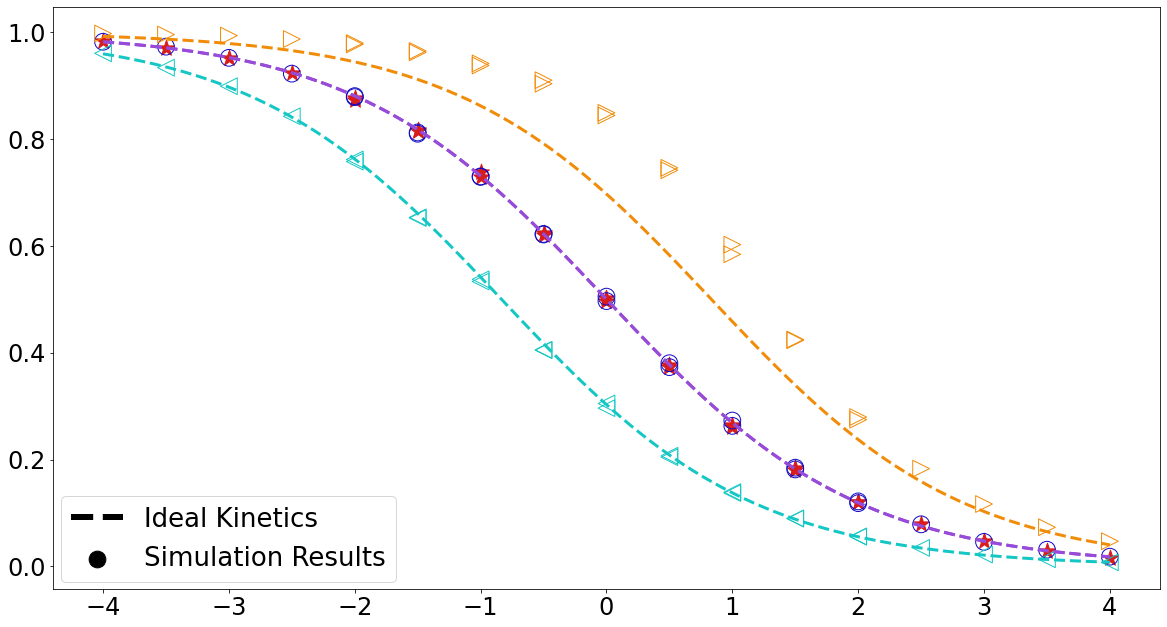

In [12]:
# #Fig 3 - altered for Table of Contents image
# fig,ax = plt.subplots(figsize=(16,16/(3.25/1.75)))

# barwidth = 0.5
# x_chain = np.linspace(0,100,101)

# chainstiff = ['flex']
# shape = ['*','o','>','<']
# figlabel = ['a','b','c','d']
# color3 = ['#D81B1B','#110AC5','#F18C09','#14C7C4']

# trials = 3

# everyp = []
# for c in range(len(chainstiff)):  
    
#     for i in range(len(allEEAAcase)):#4 attraction case
#         connectdelta = []
#         connectp = []
        
#         if i == 0 or i == 1:
            
#             color = '#974BD8'
#             alpha = 1
#         if i == 2:
#             a = 2.3017357790079904
#             alpha = a
#             color = color3[i]
            
#         if i == 3:
#             a = 2.3017357790079904
#             alpha = 1/a
#             color = color3[i]
        
        
        
#         DeltaE2 = np.linspace(-4,4,100)
#         eAA = float(allEEAAcase[i][0])/3
#         eAB = float(allEEABcase[i][0])/3
#         predictedp = (alpha*(np.exp(-DeltaE2)))/(alpha*np.exp(-DeltaE2)+1)
        
#         if  i == 2:
#             blahy = np.copy(predictedp)
#             blahx = np.copy(DeltaE2)
#             blah2x = []
#             blah2y = []
        
     
#         ax.plot(np.array(DeltaE2),predictedp, linestyle = 'dashed', color = color, linewidth = 3)  

            
#         for e in range(len(allEEAAcase[i])):
#             Ea = e
#             allprobs = []    
#             for trial in range(trials) : 
#                 simname = '220121_copoly_%sepsAA_%sepsAB_%sepsBB_%srbAA_%srbBB_%srbAB_%s-%i'%(allEEAAcase[i][e],
#                                                                                               allEEABcase[i][e],
#                                                                                                allEEBBcase[i][e],
#                                                                                                allrbAAcase[i][Ea],
#                                                                                              allrbBBcase[i][Ea],
#                                                                                              allrbABcase[i][Ea],
#                                                                                              chainstiff[c], trial+1)
            
                
                                                                                    
#                 DeltaE = (float (allrbAAcase[i][Ea]) - float(allrbABcase[i][Ea]))/3
            
            
                
                
                
#                 with open('./alljarfile/'+simname+'_extent.pickle','rb') as f1:
#                     p = pickle.load(f1)
#                     index = findp(p)
#                     everyp.append(p[index])
                    
#                 with open('./alljarfile/'+simname+'_tstep.pickle','rb') as f1:
#                     tstep = pickle.load(f1)
#                 with open('./alljarfile/'+simname+'_probs.pickle','rb') as f1:
#                     probseach = pickle.load(f1)
#                     allprobs.append(probseach[0][index]+probseach[1][index])
                    

#                 with open('./alljarfile/'+simname+'_DOP.pickle','rb') as f1:
#                     DOP = pickle.load(f1)
#             probs=np.mean(allprobs)
            

#             if i == 2:
#                 blah2y.append(probs)
#                 blah2x.append(DeltaE)
                
#             if chainstiff[c] == 'flex':
                
               
#                 if i != 0:
#                             ax.scatter(DeltaE,probs,facecolor = 'None',edgecolor = color3[i],marker = shape[i], s = 280,
#                                       label = '$E_{a}^{AA,BB}$ = %.2f, $E_{a}^{AB}$ = %.2f'%(float(allrbAAcase[i][Ea])/3,
#                                                                                        float(allrbABcase[i][Ea])/3))
#                 else:
#                      ax.scatter(DeltaE,probs,color = color3[i],marker = shape[i], s = 280,
#                                   label = '$E_{a}^{AA,BB}$ = %.2f, $E_{a}^{AB}$ = %.2f'%(float(allrbAAcase[i][Ea])/3,
#                                                                                        float(allrbABcase[i][Ea])/3))
                            
                            
                            
    
# #ax.set_ylabel('$p_{AA,BB}$',fontsize = 28)

# ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
# #ax.set_xlabel('$E_{a}^{AA,BB}$ - $E_{a}^{AB}$ ',fontsize = 28)



# fig.tight_layout() 
# handle,labels = ax.get_legend_handles_labels()
# handle = handle[:20]
# labels = labels[:20]
# labels2 = []

# labels2 += ['$\epsilon_\mathrm{AA,BB}$ = $\epsilon_\mathrm{AB}$ (Eq. 26)']
# labels2 += [r'$\epsilon_{\rm AA,BB}$ = %.2f, $\epsilon_{\rm AB}$ = %.2f (Sim)'%(float(allEEAAcase[0][0])/3,float(allEEABcase[0][0])/3)]
# labels2 += [r'$\epsilon_{\rm AA,BB}$ = %.2f, $\epsilon_{\rm AB}$ = %.2f (Sim)'%(float(allEEAAcase[1][0])/3,float(allEEABcase[1][0])/3)]
# labels2 += [r'$\epsilon_{\rm AA,BB}$ = %.2f, $\epsilon_{\rm AB}$ = %.2f (Eq. 26)'%(float(allEEAAcase[2][0])/3,float(allEEABcase[2][0])/3)]
# labels2 += [r'$\epsilon_{\rm AA,BB}$ = %.2f, $\epsilon_{\rm AB}$ = %.2f (Sim)'%(float(allEEAAcase[2][0])/3,float(allEEABcase[2][0])/3)]
# labels2 += [r'$\epsilon_{\rm AA,BB}$ = %.2f, $\epsilon_{\rm AB}$ = %.2f (Eq. 26)'%(float(allEEAAcase[3][0])/3,float(allEEABcase[3][0])/3)]
# labels2 += [r'$\epsilon_{\rm AA,BB}$ = %.2f, $\epsilon_{\rm AB}$ = %.2f (Sim)'%(float(allEEAAcase[3][0])/3,float(allEEABcase[3][0])/3)]


# colorlabel = ['rosybrown','lightcoral','indianred','orangered','red','firebrick',
#               'powderblue','lightsteelblue','cornflowerblue','royalblue','blue',
#              'palegreen','limegreen','darkgreen' ,'lightgreen','mediumseagreen',
#               'thistle','violet','mediumorchid','darkorchid'
#              ]
         

# labelline = []
 
# for i in range(len(colorlabel)):
    
#     labelline.append(Line2D([], [], color=colorlabel[i], linewidth = 6, linestyle='solid',label = labels[i]))
    
# labelline2 = []

# for i in range(len(allrbAAcase)):
#     if i == 0: 
#         labelline2.append(Line2D([], [], color='#974BD8', linestyle='dashed',linewidth = 6))
        
#         labelline2.append(Line2D([], [], color = color3[i], markersize=16, linestyle='None', markerfacecolor = color3[i],marker = shape[i]))
#     if i == 1: 
#         labelline2.append(Line2D([], [], color = color3[i], markersize=16, linestyle='None', markerfacecolor = 'None',marker = shape[i]))
        
#     if i == 2 or i == 3:
#         labelline2.append(Line2D([], [], color=color3[i], linestyle='dashed',linewidth = 6))
        
#         labelline2.append(Line2D([], [], color = color3[i], markersize=16, linestyle='None', markerfacecolor = 'None',marker = shape[i]))

# legend_artist_line, = ax.plot([],[],'--k',linewidth=6)
# legend_artist_marker = ax.scatter([],[],s=280,marker='o',color='black')
# fig.legend([legend_artist_line,legend_artist_marker], ('Ideal Kinetics', 'Simulation Results'),ncol = 1,prop={'size': 26}, loc = 6, bbox_to_anchor= (0.025,0.125))
 

# ax.set_xticks([-4,-3.0,-2.0,-1,0,1.0,2.0,3.0,4.0])
# ax.tick_params(axis='both', labelsize=24 )
# fig.savefig('ToC_Plot.png',bbox_inches='tight', dpi = 300,transparent=True)  
  

## Figure 4

In [13]:
#Get color for fluctuation metrics
from matplotlib import cm
alldeltae = []
for i in range(len(allrbAAcase[0])):
    EAA = float(allrbAAcase[0][i])/3
    EAB = float(allrbABcase[0][i])/3
    deltae = EAA-EAB
    if deltae not in alldeltae:
        alldeltae.append(deltae)
alldeltae=sorted(alldeltae)

bottom = cm.get_cmap('viridis',128)
top = cm.get_cmap('plasma',128)
middle = cm.get_cmap('Reds', 128)

newcolors = np.vstack((bottom(np.linspace(0.25,1, 128)),(middle(np.linspace(0.6,0.8,16))),
                       
                       top(np.linspace(1,0, 128)),
                    
                      ))

colorbar  = ListedColormap(newcolors, name='OrangeBlue')
vmin1 = min(alldeltae)
vmax1 = max(alldeltae)

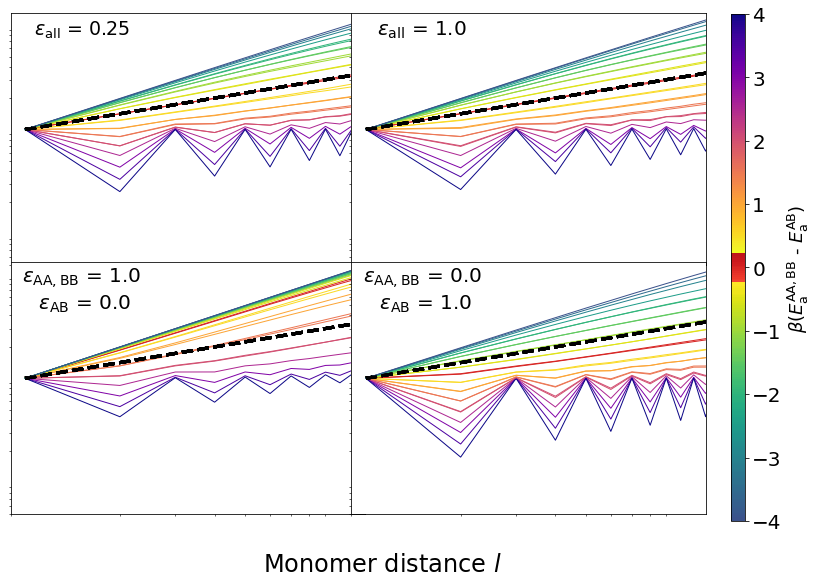

In [14]:
#Figure 4

fig,ax = plt.subplots(2,2,figsize=(10,8))

position=fig.add_axes([1.02,0.1,0.02,0.88])  ## the parameters are the specified position you set 

 
norm = matplotlib.colors.Normalize(vmin = vmin1, vmax = vmax1)
sm = plt.cm.ScalarMappable(norm=norm,cmap=colorbar)
sm.set_array([]) 

cb = fig.colorbar(sm,ax = ax.ravel().tolist(),cax = position )


cb.set_label(label = '$\u03B2(E_\mathrm{a}^\mathrm{AA,BB}$ - $E_\mathrm{a}^\mathrm{AB}$) '
             , size=18)


cb.ax.tick_params(labelsize=20)
barwidth = 0.5
x_chain = np.linspace(0,100,101)

chainstiff_c = ['flex']
shape = '<'
figlabel = ['a','b','c','d']

trials = 3
eAA_compare  = [['0.75','0.75'],['3.0','3.0'],['3.0','3.0'],['0.0','0.0']]
eBB_compare  = [['0.75','0.75'],['3.0','3.0'],['3.0','3.0'],['0.0','0.0']]
eAB_compare  = [['0.75','0.75'],['3.0','3.0'],['0.0','0.0'],['3.0','3.0']]
rAA_compare = [['9.0','9.0','3.0','6.0'],['9.0','9.0','3.0','6.0'],['9.0','9.0','3.0','6.0'],['9.0','9.0','3.0','6.0']]
rBB_compare = [['9.0','9.0','3.0','6.0'],['9.0','9.0','3.0','6.0'],['9.0','9.0','3.0','6.0'],['9.0','9.0','3.0','6.0']]
rAB_compare = [['6.0','3.0','9.0','9.0'],['6.0','3.0','9.0','9.0'],['6.0','3.0','9.0','9.0'],['6.0','3.0','9.0','9.0']]

maxl = 1000
for i in range(len(allEEAAcase)):#4 attraction case
    
    if i == 0:
        m,k  = 0,0
        size = 19
    if i == 1:
        m,k = 0,1
        size = 20
    if i == 2:
        m,k = 1,0
        size = 20
    if i == 3:
        m,k = 1,1
        size = 20
    for cc in range(len(chainstiff_c)):
        if chainstiff_c[cc] == 'stiff':
            style = 'dotted'
            color = 'blue'
        else:
            style = 'solid'
            color = 'red'
        
        
    
       
        
        for e in range(len(allrbAAcase[i])):
                        
           
            Ea = e
            
            allflucs = []
            alll = []
            allseqs = []
            DeltaE = (float (allrbAAcase[i][Ea]) - float(allrbABcase[i][Ea]))/3

            for trial in range(trials):
                
                

                simname = '220121_copoly_%sepsAA_%sepsAB_%sepsBB_%srbAA_%srbBB_%srbAB_%s-%i'%(allEEAAcase[i][e],
                                                                                              allEEABcase[i][e],
                                                                                               allEEBBcase[i][e],
                                                                                               allrbAAcase[i][Ea],
                                                                                             allrbBBcase[i][Ea],
                                                                                             allrbABcase[i][Ea],
                                                                                             chainstiff[c], trial+1)
                
        
                                                                                         
            
                    
            
                
                
                #print(simname)
                with open('./alljarfile/'+simname+'_extent.pickle','rb') as f1:
                    p = pickle.load(f1)
                with open('./alljarfile/'+simname+'_tstep.pickle','rb') as f1:
                    tstep = pickle.load(f1)
                with open('./alljarfile/'+simname+'_probs.pickle','rb') as f1:
                    probs = pickle.load(f1)



                with open('./alljarfile/'+simname+'_BlockPDI.pickle','rb') as f1:
                    BlockPDI = pickle.load(f1)
                    

                with open('./alljarfile/'+simname+'_seqs.pickle','rb') as f1:
                    seqs   = pickle.load(f1)
                    l,flucs = fluctuations(seqs)
                    allflucs.append(flucs)
                    
                    alll.append(l)
                    allseqs.append(seqs)
                    
            allflucs_final  = np.nanmean(np.array(list(zip_longest(*np.array(allflucs))),dtype = float),axis = 1) 
            
            alll_final = np.nanmean(np.array(list(zip_longest(*np.array(alll))),dtype = float),axis = 1) 
                    

                
            ax[m,k].set_xscale('log')
            ax[m,k].set_yscale('log')
            ax[m,k].tick_params(axis='both', labelsize=22)


            
            ax[m,k].set_title('$\epsilon_{AA,BB}$ = %s, $\epsilon_{AB}$ = %s'%(float(allEEAAcase[i][e])/3,
                                        float(allEEABcase[i][e])/3),
                                        x = 0.5,y=0.97, pad=-14, fontsize = size)
            
                            
         
                    
                
                
                
            
            ax[m,k].plot(alll_final,allflucs_final, linewidth = 1., color=colorbar((DeltaE-vmin1)/(vmax1-vmin1)))

                
            ax[m,k].set_xlim((0.9,12))
            ax[m,k].set_ylim((0.05,13))
            ax[m,k].set_xticks([])
            ax[m,k].set_yticks([])

            ax[m,k].plot(alll_final,alll_final**0.5,color = 'black', linestyle = '--', linewidth = 3)
            ax[m,k].tick_params(axis='both', labelsize=22)


            if i ==2 or i == 3 : 
                ax[m,k].set_title('$\epsilon_\mathrm{AA,BB}$ = %s\n $\epsilon_\mathrm{AB}$ = %s'%(float(allEEAAcase[i][e])/3,
                                        float(allEEABcase[i][e])/3),
                                        x = 0.2,y=0.87, pad=-14, fontsize = size)
            else:
                ax[m,k].set_title('$\epsilon_\mathrm{all}$ = %s'%(float(allEEAAcase[i][e])/3,
                                        ),
                                        x = 0.2,y=0.97, pad=-14, fontsize = size)
            
                
                

ax[1,0].set_xlabel('Monomer distance $l$',fontsize = 24)
ax[1,0].xaxis.set_label_coords(1.05, -0.15)

labelline = []
labelline.append(Line2D([], [], color='red', linestyle='solid'))
labelline.append(Line2D([], [], color='blue', linestyle='dotted'))
labels = ['F(l) for flexible chains', 'F(l) for stiff chains']

fig.tight_layout(h_pad = -1, w_pad = -3)

#fig.savefig('Allflucs_flex.png',bbox_inches='tight', dpi = 300)  
  

## Figure 5

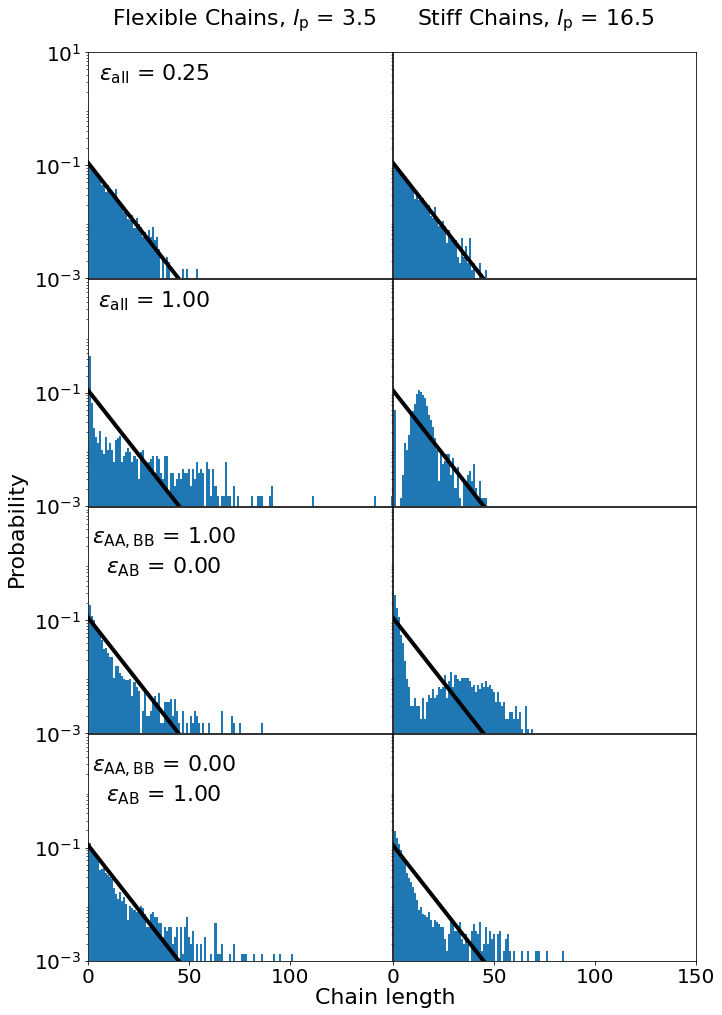

In [15]:
#Fig 5


c = 0   
fig,ax = plt.subplots(4,2, figsize =(10,14))

barwidth = 0.75
x_chain = np.linspace(0,100,101)

chainstiff = ['flex','stiff']
shape = '<'
figlabel = ['a','b','c','d','e',
            'f','g','h','i','j',
            'k','l','m','n','o',
            'p','q','r','s','t',
            'u','v','w','x','y',
            'z']
max_chain= 10
maxblock = 400
n = np.linspace(0,maxblock-1,maxblock)

maxchainlength = 400
nchain = np.linspace(0,maxchainlength-1,maxchainlength)


blockeAAcase = ['0.75','3.0','3.0','0.0']
               
blockeBBcase = ['0.75','3.0','3.0','0.0']
blockeABcase = ['0.75','3.0','0.0','3.0'
                ]
blockrbAAcase = ['9.0','9.0','9.0','9.0']
               
blockrbBBcase = ['9.0','9.0','9.0','9.0']
blockrbABcase = ['3.0','3.0','3.0','3.0'
                ]
figtrack = 0
trials = 3
allseqs = []
figl = 0
A = {1:1.390138707689637,0:0.6156923525250528,0.25:1,} # To get ratio of Aii, Aij and then ratio of Aii/Aij


for i in range(len(chainstiff)):#4 attraction case
    
        
    
        
        for e in range(len(blockrbAAcase)):
            m = e
            k = i
            
                
            Ea = e
            xmax = 100
            BlockTotal = np.zeros((maxblock))
            ChainTotal = np.zeros((maxchainlength))
            
           

            pAABB = [] 
            allp = []
            for trial in range(trials): 
                simname = '220121_copoly_%sepsAA_%sepsAB_%sepsBB_%srbAA_%srbBB_%srbAB_%s-%i'%(blockeAAcase[e],
                                                                                              blockeABcase[e],
                                                                                               blockeBBcase[e],
                                                                                               blockrbAAcase[Ea], 
                                                                                             blockrbBBcase[Ea],
                                                                                             blockrbABcase[Ea],
                                                                                             chainstiff[i], trial+1)
        
                                                                                         
            
                
                    
                DeltaE = (float (blockrbAAcase[Ea]) - float(blockrbABcase[Ea]))/3
                
                
                with open('./alljarfile/'+simname+'_extent.pickle','rb') as f1:
                    p = pickle.load(f1)
                    index = findp(p)
                    allp.append(p[index])
                with open('./alljarfile/'+simname+'_probs.pickle','rb') as f1:
                    probs = pickle.load(f1)
                    pAABB.append(probs[2][-1])



                with open('./alljarfile/'+simname+'_BlockA.pickle','rb') as f1:
                    BlockADist = pickle.load(f1)


                with open('./alljarfile/'+simname+'_BlockB.pickle','rb') as f1:
                    BlockBDist = pickle.load(f1)
            
            
            
                
                for id, val in enumerate(BlockADist[0]):
                    BlockTotal[val] += BlockADist[1][id]

                for id, val in enumerate(BlockBDist[0]):
                    BlockTotal[val] += BlockBDist[1][id]
                    
                with open('./alljarfile/'+simname+'_ChainDist.pickle','rb') as f1:
                    ChainDist = pickle.load(f1)
                
                with open('./alljarfile/'+simname+'_seqs.pickle','rb') as f1:
                    seqs   = pickle.load(f1)

                
            
            
            
                
                for id, val in enumerate(ChainDist[0]):
                    ChainTotal[val] += ChainDist[1][id]
            BlockTotal /= trials
            ChainTotal /= trials
            p = np.mean(allp)
            allseqs.append(seqs)
            figl += 1
            eAA = float(blockeAAcase[e])/3
            eAB = float(blockeABcase[e])/3
            Aii = A[eAA]
            Aij = A[eAB]
            alpha = Aii/Aij
            
            
            predictedp = (alpha*(np.exp(-DeltaE)))/(alpha*np.exp(-DeltaE)+1) 
            rA = alpha * np.exp(-DeltaE)
            pAABB = predictedp


            Flory = (1 - p)*(p**(nchain-1))
            ax[m,k].plot(nchain,Flory, '-k', linestyle = 'solid', linewidth = 4)
            ax[m,k].bar(nchain,ChainTotal/np.sum(ChainTotal),align='center', width = 1,
                        
                            label = '$E_{a}^{AA,BB}$ = %.2f, $E_{a}^{AB}$ = %.2f'%(float(blockrbAAcase[Ea])/3,
                                                                                  float(blockrbABcase[Ea])/3))
            
#             
            
            ax[m,k].set_xlim((0,150))
            ax[m,k].set_ylim((1e-3,1e1))
            ax[m,k].set_yscale('log')
            
            ax[m,k].set_xticks([])
            ax[m,k].set_yticks([])
            ax[m,k].tick_params(axis='both', labelsize=20)
            if k == 0:
                if float(blockeAAcase[e])/3 != float(blockeABcase[e])/3:
                    ax[m,k].set_title('$\epsilon_\mathrm{AA,BB}$ = %.2f\n$\epsilon_\mathrm{AB}$ = %.2f\n'%(float(blockeAAcase[e])/3,

                                                 float(blockeABcase[e])/3),
                                    x = 0.25, y = 0.57, fontsize = 22)
                else: 
                    ax[m,k].set_title('$\epsilon_\mathrm{all}$ = %.2f'%(float(blockeAAcase[e])/3),


                                    x = 0.22, y = 0.85, fontsize = 22)
                              
                                         
ax[0,0].text(12,30,'Flexible Chains, $l_\mathrm{p}$ = 3.5',fontsize =22)     
ax[0,1].text(12,30,'Stiff Chains, $l_\mathrm{p}$ = 16.5',fontsize = 22)     
                        
                      
            


            
ax[3,1].set_xticks([0,50,100,150])
ax[3,0].set_xticks([0,50,100])

ax[0,0].set_yticks([1e-3,1e-1,1e1])
ax[1,0].set_yticks([1e-3,1e-1])
ax[2,0].set_yticks([1e-3,1e-1])
ax[3,0].set_yticks([1e-3,1e-1])
                    

ax[3,0].set_xlabel('Chain length',fontsize = 22)
ax[3,0].xaxis.set_label_coords(0.98, -0.12)


ax[1,0].set_ylabel('Probability',fontsize = 22)
ax[1,0].yaxis.set_label_coords(-0.2, -0.1)


red_patch = mpatches.Patch(color='orange', label='A block + B block')  
line = Line2D([], [], linewidth = 3,
                           linestyle='solid',color = 'black', 

                          label = 'Markovian'
                         )

red_patch2 = mpatches.Patch(color='C0', label='Chain length')  
line2 = Line2D([], [], linewidth = 3,
                           linestyle='dashed',color = 'black', 

                          label = 'Flory-Schulz'
                         )

                    
                    
fig.tight_layout(h_pad = -2.33, w_pad = -3.33)

#fig.savefig('AllChain_flexstiff.png',bbox_inches='tight')  



## Figure 6

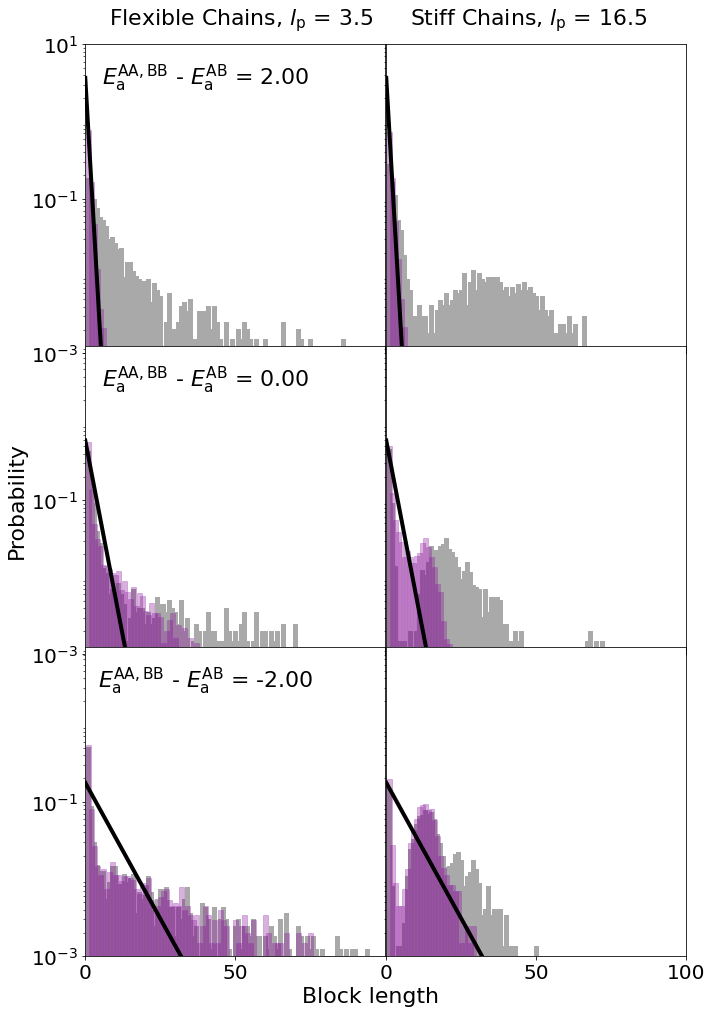

In [16]:
#Fig 6


c = 0   
fig,ax = plt.subplots(3,2, figsize =(10,14))


barwidth = 0.75
x_chain = np.linspace(0,100,101)

chainstiff = ['flex','stiff']
shape = '<'
figlabel = ['a','b','c','d','e',
            'f','g','h','i','j',
            'k','l','m','n','o',
            'p','q','r','s','t',
            'u','v','w','x','y',
            'z']
max_chain= 10
maxblock = 400
n = np.linspace(0,maxblock-1,maxblock)

maxchainlength = 400
nchain = np.linspace(0,maxchainlength-1,maxchainlength)


blockeAAcase = ['3.0','3.0','3.0']
               
blockeBBcase = ['3.0','3.0','3.0']
blockeABcase = ['0.0','0.0','0.0'
                ]
blockrbAAcase = ['9.0','9.0','3.0']
               
blockrbBBcase = ['9.0','9.0','3.0']
blockrbABcase = ['3.0','9.0','9.0']
                
figtrack = 0
trials = 3
allseqs = []
figl = 0
everyp = []


A = {1:1.417571299101691,0:0.6158705582239508,0.25:1,} # To get ratio of Aii, Aij and then ratio of Aii/Aij
for i in range(len(chainstiff)):#4 attraction case
    
        
    
        
        for e in range(len(blockrbAAcase)):
            m = e
            k = i
            
                
            Ea = e
            xmax = 100
            BlockTotal = np.zeros((maxblock))
            ChainTotal = np.zeros((maxchainlength))
            
           

            pAABB = [] 
            allp = []
            for trial in range(trials): 
                simname = '220121_copoly_%sepsAA_%sepsAB_%sepsBB_%srbAA_%srbBB_%srbAB_%s-%i'%(blockeAAcase[e],
                                                                                              blockeABcase[e],
                                                                                               blockeBBcase[e],
                                                                                               blockrbAAcase[Ea], 
                                                                                             blockrbBBcase[Ea],
                                                                                             blockrbABcase[Ea],
                                                                                             chainstiff[i], trial+1)
        
                                                                                         
            
                
                    
                DeltaE = (float (blockrbAAcase[Ea]) - float(blockrbABcase[Ea]))/3
                
                
                
                
                with open('./alljarfile/'+simname+'_extent.pickle','rb') as f1:
                    p = pickle.load(f1)
                    index = findp(p)
                    everyp.append(p[index])
                    allp.append(p[index])
                with open('./alljarfile/'+simname+'_probs.pickle','rb') as f1:
                    probs = pickle.load(f1)
                    pAABB.append(probs[2][index])



                with open('./alljarfile/'+simname+'_BlockA.pickle','rb') as f1:
                    BlockADist = pickle.load(f1)


                with open('./alljarfile/'+simname+'_BlockB.pickle','rb') as f1:
                    BlockBDist = pickle.load(f1)
            
            
            
                
                for id, val in enumerate(BlockADist[0]):
                    BlockTotal[val] += BlockADist[1][id]

                for id, val in enumerate(BlockBDist[0]):
                    BlockTotal[val] += BlockBDist[1][id]
                    
                with open('./alljarfile/'+simname+'_ChainDist.pickle','rb') as f1:
                    ChainDist = pickle.load(f1)
                
                with open('./alljarfile/'+simname+'_seqs.pickle','rb') as f1:
                    seqs   = pickle.load(f1)

                
            
            
            
                
                for id, val in enumerate(ChainDist[0]):
                    ChainTotal[val] += ChainDist[1][id]
            BlockTotal /= trials
            ChainTotal /= trials
            p = np.mean(allp)
            allseqs.append(seqs)
            figl += 1
            eAA = float(blockeAAcase[Ea])/3
            eAB = float(blockeABcase[Ea])/3
            Aii = A[eAA]
            Aij = A[eAB]
            alpha = Aii/Aij
            

            predictedp = (alpha*(np.exp(-DeltaE)))/(alpha*np.exp(-DeltaE)+1) 

            pAABB = predictedp
            

            ax[m,k].bar(nchain,ChainTotal/np.sum(ChainTotal),align='center', width = 1.7, color = 'darkgray', alpha = 1.,
                        edgecolor = 'None' ,
                            label = '$E_{a}^{AA,BB}$ = %.2f, $E_{a}^{AB}$ = %.2f'%(float(blockrbAAcase[Ea])/3,
                                                                                  float(blockrbABcase[Ea])/3))
            
            ax[m,k].bar(n,BlockTotal/np.sum(BlockTotal),align = 'center', color = 'purple', edgecolor = 'darkorchid',width = 1.7,alpha = 0.3,
                            label = '$E_{a}^{AA,BB}$ = %.2f, $E_{a}^{AB}$ = %.2f'%(float(blockrbAAcase[Ea])/3,
                                                                                  float(blockrbABcase[Ea])/3))
                
        
            
            
            Markovian = (1-(p*pAABB))*(p*pAABB)**(n-1)
            
            ax[m,k].plot(n,Markovian,'-k', color = 'black', linewidth = 4)
            
            ax[m,k].set_xlim((0,100))
            ax[m,k].set_ylim((1e-3,1e1))
            ax[m,k].set_yscale('log')

            ax[m,k].set_xticks([])
            ax[m,k].set_yticks([])
            ax[m,k].tick_params(axis='both', labelsize=20)
            if k ==0 :
                ax[m,k].set_title('$E_\mathrm{a}^\mathrm{AA,BB}$ - $E_\mathrm{a}^\mathrm{AB}$ = %.2f'%(float(blockrbAAcase[Ea])/3 - float(blockrbABcase[Ea])/3)
                                 ,
                                 x = 0.4, y = 0.85, fontsize = 22)
            

ax[0,0].text(8,18,'Flexible Chains, $l_\mathrm{p}$ = 3.5',fontsize = 22)     
ax[0,1].text(8,18,'Stiff Chains, $l_\mathrm{p}$ = 16.5',fontsize = 22)     
                        
                      

            
ax[2,1].set_xticks([0,50,100])
ax[2,0].set_xticks([0,50])
ax[0,0].set_yticks([1e-3,1e-1,1e1])
ax[1,0].set_yticks([1e-3,1e-1])
ax[2,0].set_yticks([1e-3,1e-1])

                    

ax[2,0].set_xlabel('Block length',fontsize = 22)
ax[2,0].xaxis.set_label_coords(0.95, -0.1)
ax[1,0].set_ylabel('Probability',fontsize = 22)


red_patch = mpatches.Patch(color='purple', label='A block + B block')  
line = Line2D([], [], linewidth = 3,
                           linestyle='solid',color = 'black', 

                          label = 'Markovian'
                         )

red_patch2 = mpatches.Patch(color='C0', label='Chain length')  
line2 = Line2D([], [], linewidth = 3,
                           linestyle='dashed',color = 'black', 

                          label = 'Flory-Schulz'
                         )

                    
                    
fig.tight_layout(h_pad = -2, w_pad = -3.35)

#fig.savefig('AllBlock_flexstiff.png',bbox_inches='tight',dpi=300)  



## SI Figures

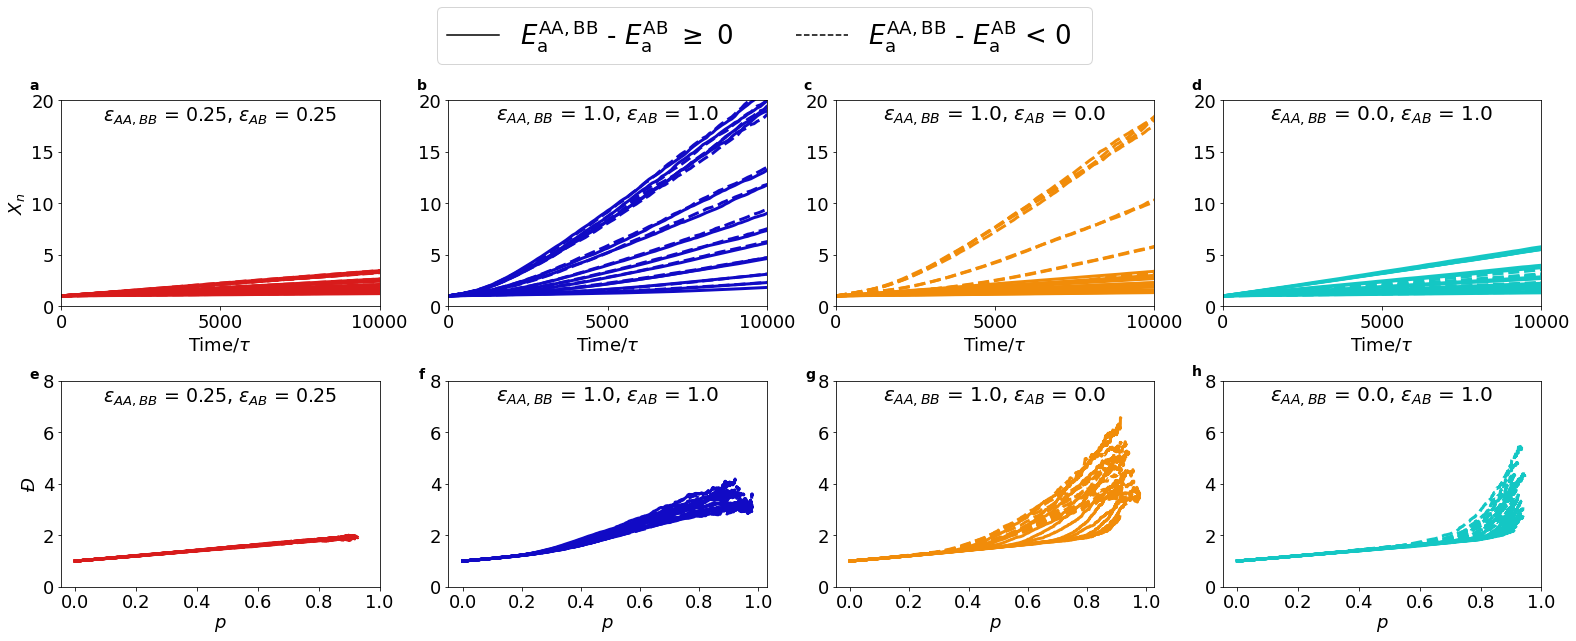

In [17]:
#Figure S3

color3 = ['#D81B1B','#110AC5','#F18C09','#14C7C4']

chainstiff = ['flex']


dashcolor = ['springgreen','green','darkgreen']
solidcolor = ['thistle','violet','mediumorchid','darkorchid','mediumpurple','rebeccapurple']
trials = 1

colors = {0.5:'lightcoral',1:'indianred',1.5:'orangered',2:'red',2.5:'firebrick',3.0:'red',
          -0.5:'palegreen',-1.5:'limegreen',-2.5:'darkgreen',-3.0:'green'
         ,-1:'lightgreen',-2.0:'mediumseagreen',0:'rosybrown'
         }

colors2 = {0.5:'lightsteelblue',1:'cornflowerblue',1.5:'royalblue',2:'blue',2.5:'darkblue'
           ,-0.5:'thistle',-1:'violet',-1.5:'mediumorchid',-2:'darkorchid',-2.5:'mediumpurple',0.0:'powderblue'
           }
c = 0   
fig,ax = plt.subplots(2,4,figsize=(22,8))

barwidth = 0.5
x_chain = np.linspace(0,100,101)

chainstiff = ['flex']
shape = '<'
figlabel = ['a','b','c','d']
trials = 3
   
for i in range(len(allEEAAcase)):#4 attraction case
        
        m,k = 0, i
        if i ==0 :
            size = 19
        else:
            size = 20
        for e in range(len(allrbAAcase[i])):
            
           
            Ea = e
            

            allXn = []
            alltime = []
            allp = []
            allPDI = []
            for trial in range(trials):
                simname = '220121_copoly_%sepsAA_%sepsAB_%sepsBB_%srbAA_%srbBB_%srbAB_%s-%i'%(allEEAAcase[i][e],
                                                                                              allEEABcase[i][e],
                                                                                               allEEBBcase[i][e],
                                                                                               allrbAAcase[i][Ea],
                                                                                             allrbBBcase[i][Ea],
                                                                                             allrbABcase[i][Ea],
                                                                                             chainstiff[c],trial+1)
        
                                                                                         
            
                
                    
                DeltaE = (float (allrbAAcase[i][Ea]) - float(allrbABcase[i][Ea]))/3



                with open('./alljarfile/'+simname+'_extent.pickle','rb') as f1:
                    p = pickle.load(f1)
                    allp.append(p)
                with open('./alljarfile/'+simname+'_tstep.pickle','rb') as f1:
                    tstep = pickle.load(f1)
                    alltime.append(tstep)
                with open('./alljarfile/'+simname+'_probs.pickle','rb') as f1:
                    probs = pickle.load(f1)

                with open('./alljarfile/'+simname+'_DOP.pickle','rb') as f1:
                    Xn = pickle.load(f1)
                    allXn.append(Xn)
                with open('./alljarfile/'+simname+'_PDI.pickle','rb') as f1:
                    PDI = pickle.load(f1)
                    allPDI.append(PDI)
            
            PDI = np.nanmean(np.array(list(zip_longest(*allPDI)),dtype = float),axis = 1) 
            p = np.nanmean(np.array(list(zip_longest(*allp)),dtype = float),axis = 1) 
                
            Xn = np.nanmean(np.array(list(zip_longest(*allXn)),dtype = float),axis = 1) 
            tstep = np.nanmean(np.array(list(zip_longest(*alltime)),dtype = float),axis = 1) 
                

            if chainstiff[c] == 'flex':

                ax[m,k].plot(tstep/1000,Xn,color = color3[i],linestyle = getline(DeltaE)
                                ,label = '$E_{a}^{AA,BB}$ = %.2f, $E_{a}^{AB}$ = %.2f'%(float(allrbAAcase[i][Ea])/3,
                                                                               float(allrbABcase[i][Ea])/3),linewidth = 3)

                ax[m+1,k].plot(p,PDI,color = color3[i],linestyle = getline(DeltaE)
                                ,label = '$E_{a}^{AA,BB}$ = %.2f, $E_{a}^{AB}$ = %.2f'%(float(allrbAAcase[i][Ea])/3,
                                                                               float(allrbABcase[i][Ea])/3),linewidth = 3)








                ax[m,k].set_yticks([0,5,10,15,20])
                ax[m,k].set_xticks([0,5000,10000,15000,20000])
                ax[m,k].set_ylim((0,20))
                ax[m,k].set_xlim((0,10000))
                ax[0,0].set_ylabel('$X_n$',fontsize = 18)
                ax[m,k].set_xlabel('Time/$\u03C4$',fontsize = 18)
                ax[m,k].tick_params(axis='both', labelsize=18)






                ax[m+1,k].set_yticks([0,2,4,6,8])
                ax[m+1,k].set_xticks([0,0.2,0.4,0.6,0.8,1.0])


                ax[1,0].set_ylabel('$\u0110$',fontsize = 18)
                ax[m+1,k].set_xlabel('$p$',fontsize = 18)



                ax[m+1,k].set_title('$\epsilon_{AA,BB}$ = %s, $\epsilon_{AB}$ = %s'%(float(allEEAAcase[i][e])/3,

                                        float(allEEABcase[i][e])/3),
                                        x = 0.5,y=0.97, pad=-14, fontsize = size)
                ax[m,k].set_title('$\epsilon_{AA,BB}$ = %s, $\epsilon_{AB}$ = %s'%(float(allEEAAcase[i][e])/3,

                                        float(allEEABcase[i][e])/3),
                                        x = 0.5,y=0.97, pad=-14, fontsize = size)
                ax[m+1,k].tick_params(axis='both', labelsize=18)
                

                
                    


ax[0,0].text(-1000,21,'a',fontsize = 14, weight = 'bold')
ax[0,1].text(-1000,21,'b',fontsize = 14, weight = 'bold')
ax[0,2].text(-1000,21,'c',fontsize = 14, weight = 'bold')
ax[0,3].text(-1000,21,'d',fontsize = 14, weight = 'bold')

ax[1,0].text(-0.15,8.1,'e',fontsize = 14, weight = 'bold')
ax[1,1].text(-0.15,8.1,'f',fontsize = 14, weight = 'bold')
ax[1,2].text(-0.15,8.1,'g',fontsize = 14, weight = 'bold')
ax[1,3].text(-0.15,8.2,'h',fontsize = 14, weight = 'bold')

labelline2= []


labels2 = []

labelline2.append(Line2D([], [], color='black', linestyle='solid',))
labelline2.append(Line2D([], [], color='black', linestyle='dashed',))



        
labels2.append('$E_\mathrm{a}^\mathrm{AA,BB}$ - $E_\mathrm{a}^\mathrm{AB}$ $\geq$ 0  ')
labels2.append('$E_\mathrm{a}^\mathrm{AA,BB}$ - $E_\mathrm{a}^\mathrm{AB}$ < 0  ')

        
        

fig.legend(labelline2, labels2,ncol = 3,bbox_to_anchor=(0.7,1.13),prop={'size': 26})
fig.tight_layout()

#fig.savefig('AllPDI_Xn.png',bbox_inches='tight',dpi = 600)  
  

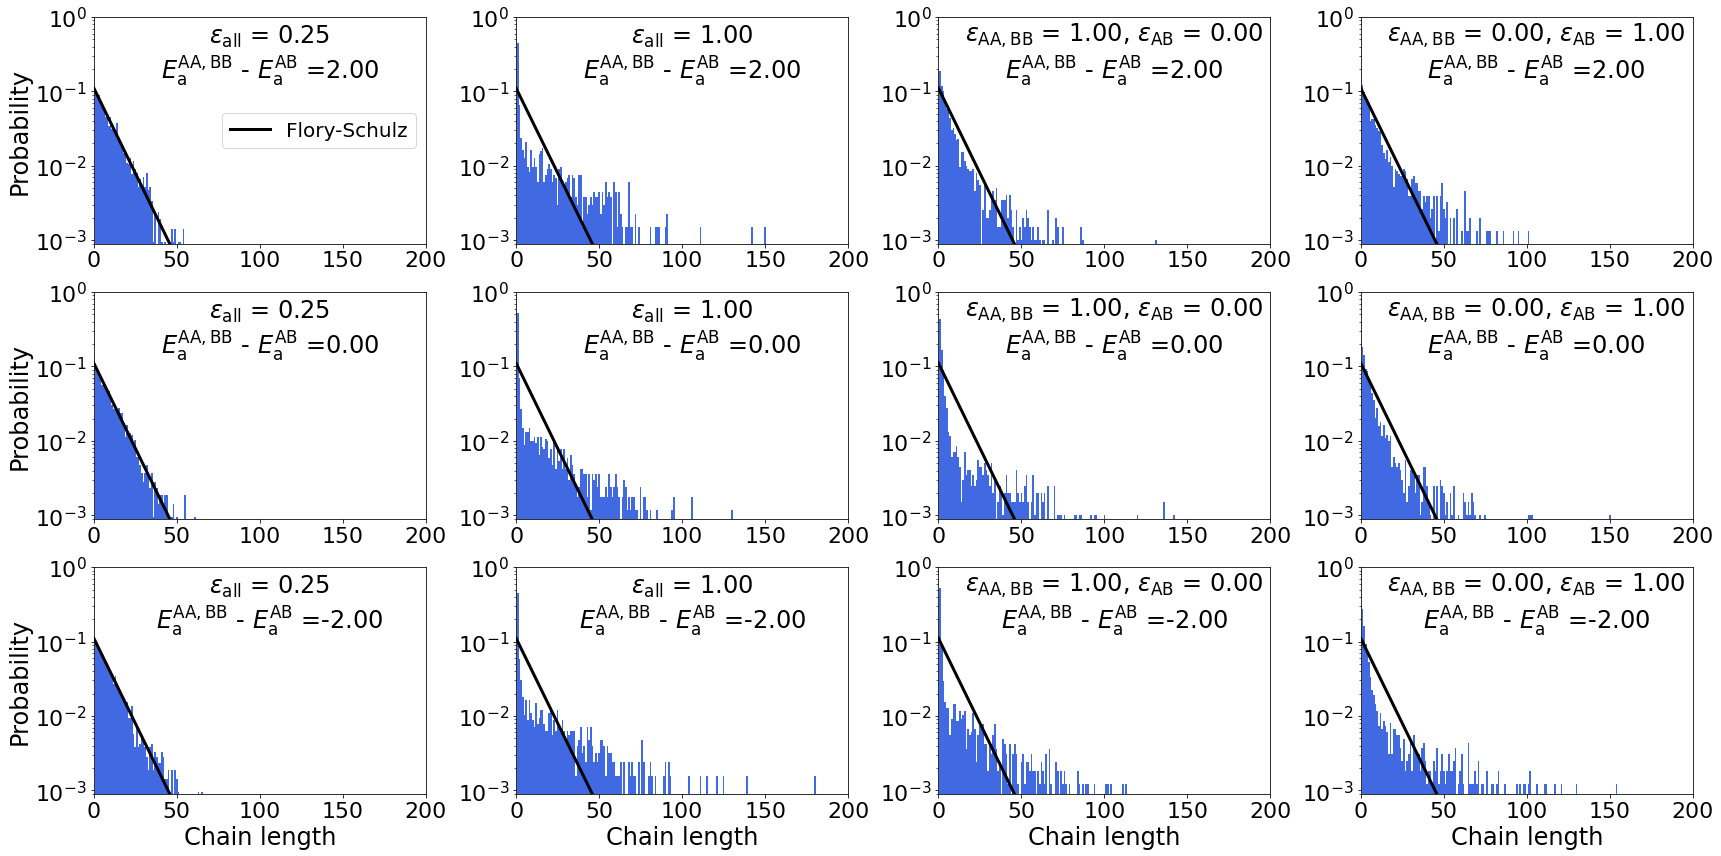

In [18]:
#Fig S4



c = 0   
fig,ax = plt.subplots(3,4, figsize =(24,12))


barwidth = 0.75
x_chain = np.linspace(0,100,101)

chainstiff = ['flex']
shape = '<'
figlabel = ['a','b','c','d','e',
            'f','g','h','i','j',
            'k','l','m','n','o',
            'p','q','r','s','t',
            'u','v','w','x','y',
            'z']
max_chain= 10
maxchainlength = 400
n = np.linspace(0,maxchainlength-1,maxchainlength)




blockeAAcase = [['0.75','3.0','3.0','0.0','0.75','3.0','3.0','0.0','0.75','3.0','3.0','0.0']]
               
blockeBBcase = [['0.75','3.0','3.0','0.0','0.75','3.0','3.0','0.0','0.75','3.0','3.0','0.0']]
blockeABcase = [['0.75','3.0','0.0','3.0','0.75','3.0','0.0','3.0','0.75','3.0','0.0','3.0']
                ]
blockrbAAcase = [['9.0','9.0','9.0','9.0','9.0','9.0','9.0','9.0','3.0','3.0','3.0','3.0']]
               
blockrbBBcase = [['9.0','9.0','9.0','9.0','9.0','9.0','9.0','9.0','3.0','3.0','3.0','3.0']]
blockrbABcase = [['3.0','3.0','3.0','3.0','9.0','9.0','9.0','9.0','9.0','9.0','9.0','9.0']
                ]
figtrack = 0
trials = 3
everyp = []

for i in range(len(blockeAAcase)):#4 attraction case
        
    
        
        for e in range(len(blockrbAAcase[i])):
            if 0 <=e <=3:
                m = 0
                k = e
                xmax = 100
                barwidth = 1
            elif 4 <= e <=7 :
                m = 1
                k = e - 4
                xmax = 20
                barwidth = 1
            else :
                m = 2
                k = e - 8
                xmax = 20
                barwidth = 1
            
                
            Ea = e
            ChainTotal = np.zeros((maxchainlength))
            
           

            pAABB = []   
            allp = []
            for trial in range(trials): 

                simname = '220121_copoly_%sepsAA_%sepsAB_%sepsBB_%srbAA_%srbBB_%srbAB_%s-%i'%(blockeAAcase[i][e],
                                                                                              blockeABcase[i][e],
                                                                                               blockeBBcase[i][e],
                                                                                               blockrbAAcase[i][Ea], 
                                                                                             blockrbBBcase[i][Ea],
                                                                                             blockrbABcase[i][Ea],
                                                                                             chainstiff[c], trial+1)
        
                                                                                         
            
                
                    
                DeltaE = (float (blockrbAAcase[i][Ea]) - float(blockrbABcase[i][Ea]))/3
                
                

                with open('./alljarfile/'+simname+'_extent.pickle','rb') as f1:
                    p = pickle.load(f1)
                    index = findp(p)
                    allp.append(p[index])
                    everyp.append(p[-1])
                with open('./alljarfile/'+simname+'_probs.pickle','rb') as f1:
                    probs = pickle.load(f1)
                    pAABB.append(probs[2][index])



                with open('./alljarfile/'+simname+'_ChainDist.pickle','rb') as f1:
                    ChainDist = pickle.load(f1)


                
            
            
            
                
                for id, val in enumerate(ChainDist[0]):
                    ChainTotal[val] += ChainDist[1][id]

                
            ChainTotal /= trials
            p = np.mean(allp)
            eAA = float(blockeAAcase[i][Ea])/3
            eAB = float(blockeABcase[i][Ea])/3
            Aii = A[eAA]
            Aij = A[eAB]
            alpha = Aii/Aij
            predictedp = (alpha*(np.exp(-DeltaE)))/(alpha*np.exp(-DeltaE)+1)
            
            

            pAABB = predictedp


            Flory = (1 - p)*(p**(n-1))
            ax[m,k].plot(n,Flory, '-k', linewidth = 3)
            ax[m,k].bar(n,ChainTotal/np.sum(ChainTotal),width=barwidth,align='center', 
                            label = '$E_{a}^{AA,BB}$ = %.2f, $E_{a}^{AB}$ = %.2f'%(float(blockrbAAcase[i][Ea])/3,
                                                                                  float(blockrbABcase[i][Ea])/3),color = 'royalblue')
                
        
                            

            
            ax[m,k].set_xlim((0,200))
            ax[m,k].set_ylim((9e-4,1))
            ax[m,k].set_yscale('log')
            ax[m,k].tick_params(axis='both', labelsize=22)
            if k ==2 or k == 3  :
                ax[m,k].set_title('$\epsilon_\mathrm{AA,BB}$ = %.2f, $\epsilon_\mathrm{AB}$ = %.2f\n'%(float(blockeAAcase[i][e])/3,

                                             float(blockeABcase[i][e])/3)+r'$E_{\rm a}^{\rm AA,BB}$ - $E_{\rm a}^{\rm AB}$ =%.2f'%(
                                            float(blockrbAAcase[i][e])/3-
                                            float(blockrbABcase[i][e])/3) ,
                                x = 0.53, y = 0.7, fontsize = 24)
            else  :
                ax[m,k].set_title('$\epsilon_\mathrm{all}$ = %.2f\n'%(float(blockeAAcase[i][e])/3

                                             )+r'$E_{\rm a}^{\rm AA,BB}$ - $E_{\rm a}^{\rm AB}$ =%.2f'%(
                                            float(blockrbAAcase[i][e])/3-
                                            float(blockrbABcase[i][e])/3) ,
                                x = 0.53, y = 0.7, fontsize = 24)
            
                                                                                                                                   
                                         
                            
                                         

                      
            
ax[2,0].set_xlabel('Chain length',fontsize = 24)
ax[2,1].set_xlabel('Chain length',fontsize = 24)
ax[2,2].set_xlabel('Chain length',fontsize = 24)
ax[2,3].set_xlabel('Chain length',fontsize = 24)

ax[0,0].set_ylabel('Probability',fontsize = 24)

ax[1,0].set_ylabel('Probability',fontsize = 24)
ax[2,0].set_ylabel('Probability',fontsize = 24)

 
line = Line2D([], [], 
                           linestyle='solid',color = 'black', 

                          label = 'Flory-Schulz', linewidth = 3
                         )
ax[0,0].legend(handles=[line],fontsize = 20, loc = 7)


fig.tight_layout()

#fig.savefig('Allchain_combine_flex.png',bbox_inches='tight')  


  

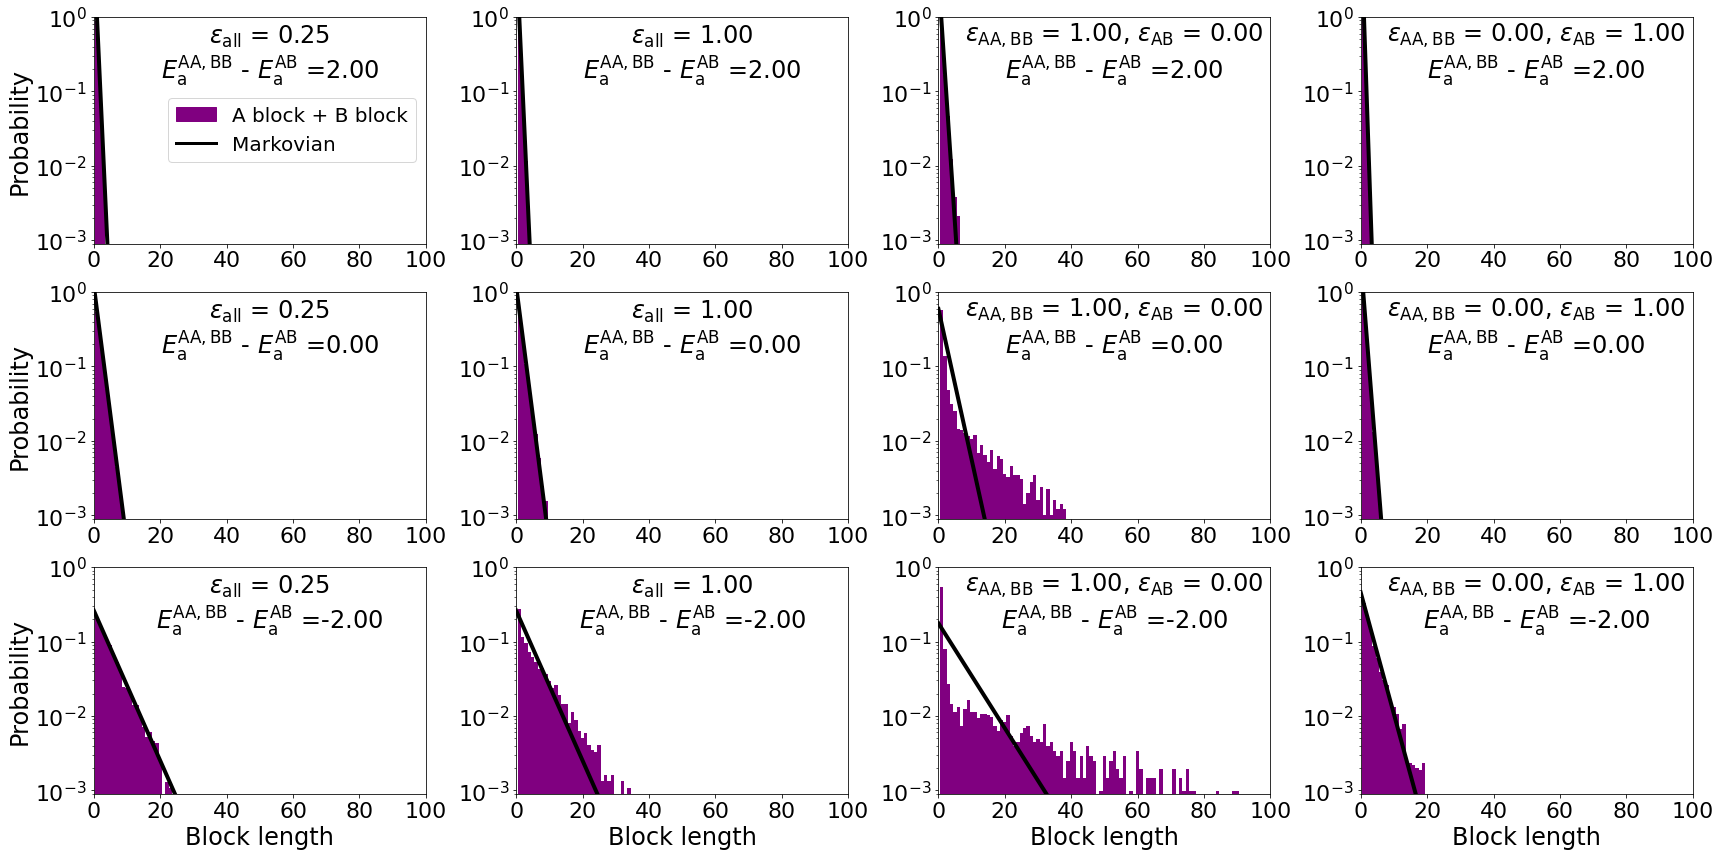

In [19]:
#Fig S5


c = 0   
fig,ax = plt.subplots(3,4, figsize =(24,12))


barwidth = 0.75
x_chain = np.linspace(0,100,101)

chainstiff = ['flex']
shape = '<'
figlabel = ['a','b','c','d','e',
            'f','g','h','i','j',
            'k','l','m','n','o',
            'p','q','r','s','t',
            'u','v','w','x','y',
            'z']
max_chain= 10
maxchainlength = 400
maxblock = 400
n = np.linspace(0,maxblock-1,maxblock)




blockeAAcase = [['0.75','3.0','3.0','0.0','0.75','3.0','3.0','0.0','0.75','3.0','3.0','0.0']]
               
blockeBBcase = [['0.75','3.0','3.0','0.0','0.75','3.0','3.0','0.0','0.75','3.0','3.0','0.0']]
blockeABcase = [['0.75','3.0','0.0','3.0','0.75','3.0','0.0','3.0','0.75','3.0','0.0','3.0']
                ]
blockrbAAcase = [['9.0','9.0','9.0','9.0','9.0','9.0','9.0','9.0','3.0','3.0','3.0','3.0']]
               
blockrbBBcase = [['9.0','9.0','9.0','9.0','9.0','9.0','9.0','9.0','3.0','3.0','3.0','3.0']]
blockrbABcase = [['3.0','3.0','3.0','3.0','9.0','9.0','9.0','9.0','9.0','9.0','9.0','9.0']
                ]
figtrack = 0
trials = 3


for i in range(len(blockeAAcase)):#4 attraction case
        
    
        
        for e in range(len(blockrbAAcase[i])):
            if 0 <=e <=3:
                m = 0
                k = e
                xmax = 100
                barwidth = 1
            elif 4 <= e <=7 :
                m = 1
                k = e - 4
                xmax = 20
                barwidth = 1
            else :
                m = 2
                k = e - 8
                xmax = 20
                barwidth = 1
            
                
            Ea = e
            ChainTotal = np.zeros((maxchainlength))
            BlockTotal = np.zeros(maxblock)
            
           

            pAABB = []   
            allp = []
            for trial in range(trials): 

                simname = '220121_copoly_%sepsAA_%sepsAB_%sepsBB_%srbAA_%srbBB_%srbAB_%s-%i'%(blockeAAcase[i][e],
                                                                                              blockeABcase[i][e],
                                                                                               blockeBBcase[i][e],
                                                                                               blockrbAAcase[i][Ea], 
                                                                                             blockrbBBcase[i][Ea],
                                                                                             blockrbABcase[i][Ea],
                                                                                             chainstiff[c], trial+1)
        
                                                                                         
            
                
                    
                DeltaE = (float (blockrbAAcase[i][Ea]) - float(blockrbABcase[i][Ea]))/3
                
                
                

                with open('./alljarfile/'+simname+'_extent.pickle','rb') as f1:
                    p = pickle.load(f1)
                    index = findp(p)
                    allp.append(p[index])
                with open('./alljarfile/'+simname+'_probs.pickle','rb') as f1:
                    probs = pickle.load(f1)
                    pAABB.append(probs[2][index])



                with open('./alljarfile/'+simname+'_ChainDist.pickle','rb') as f1:
                    ChainDist = pickle.load(f1)


                
            
            
            
                
                
                with open('./alljarfile/'+simname+'_BlockA.pickle','rb') as f1:
                    BlockADist = pickle.load(f1)


                with open('./alljarfile/'+simname+'_BlockB.pickle','rb') as f1:
                    BlockBDist = pickle.load(f1)   
                for id, val in enumerate(BlockADist[0]):
                    BlockTotal[val] += BlockADist[1][id]

                for id, val in enumerate(BlockBDist[0]):
                    BlockTotal[val] += BlockBDist[1][id]
                    
               
                
            
            
            
                
                for id, val in enumerate(ChainDist[0]):
                    ChainTotal[val] += ChainDist[1][id]
            BlockTotal /= trials

                
            
            p = np.mean(allp)
            eAA = float(blockeAAcase[i][e])/3
            eAB = float(blockeABcase[i][e])/3

            Aii = A[eAA]
            Aij = A[eAB]
            alpha = Aii/Aij
            
            predictedp = (alpha*(np.exp(-DeltaE)))/(alpha*np.exp(-DeltaE)+1)

            pAABB = predictedp

            Markovian = (1 - p*pAABB)*(p*pAABB)**(n-1)
            ax[m,k].plot(n,Markovian, '-k', linewidth = 4)
            ax[m,k].bar(n,BlockTotal/np.sum(BlockTotal),width=barwidth,align='center', color = 'purple',
                            label = '$E_{a}^{AA,BB}$ = %.2f, $E_{a}^{AB}$ = %.2f'%(float(blockrbAAcase[i][Ea])/3,
                                                                                  float(blockrbABcase[i][Ea])/3))
                
        

            
            ax[m,k].set_xlim((0,100))
            ax[m,k].set_ylim((9e-4,1))
            ax[m,k].set_yscale('log')

            ax[m,k].tick_params(axis='both', labelsize=22)
            if k ==2 or k == 3  :
                ax[m,k].set_title('$\epsilon_\mathrm{AA,BB}$ = %.2f, $\epsilon_\mathrm{AB}$ = %.2f\n'%(float(blockeAAcase[i][e])/3,

                                             float(blockeABcase[i][e])/3)+r'$E_{\rm a}^{\rm AA,BB}$ - $E_{\rm a}^{\rm AB}$ =%.2f'%(
                                            float(blockrbAAcase[i][e])/3-
                                            float(blockrbABcase[i][e])/3) ,
                                x = 0.53, y = 0.7, fontsize = 24)
            else  :
                ax[m,k].set_title('$\epsilon_\mathrm{all}$ = %.2f\n'%(float(blockeAAcase[i][e])/3

                                             )+r'$E_{\rm a}^{\rm AA,BB}$ - $E_{\rm a}^{\rm AB}$ =%.2f'%(
                                            float(blockrbAAcase[i][e])/3-
                                            float(blockrbABcase[i][e])/3) ,
                                x = 0.53, y = 0.7, fontsize = 24)

ax[2,0].set_xlabel('Block length',fontsize = 24)
ax[2,1].set_xlabel('Block length',fontsize = 24)
ax[2,2].set_xlabel('Block length',fontsize = 24)
ax[2,3].set_xlabel('Block length',fontsize = 24)

ax[0,0].set_ylabel('Probability',fontsize = 24)

ax[1,0].set_ylabel('Probability',fontsize = 24)
ax[2,0].set_ylabel('Probability',fontsize = 24)

red_patch = mpatches.Patch(color='purple', label='A block + B block')  
line = Line2D([], [], 
                           linestyle='solid',color = 'black', 

                          label = 'Markovian', linewidth = 3
                         )
ax[0,0].legend(handles=[red_patch,line],fontsize = 20, loc = 7)


fig.tight_layout()

#fig.savefig('Block_allcase_flex.png',bbox_inches='tight')  


  

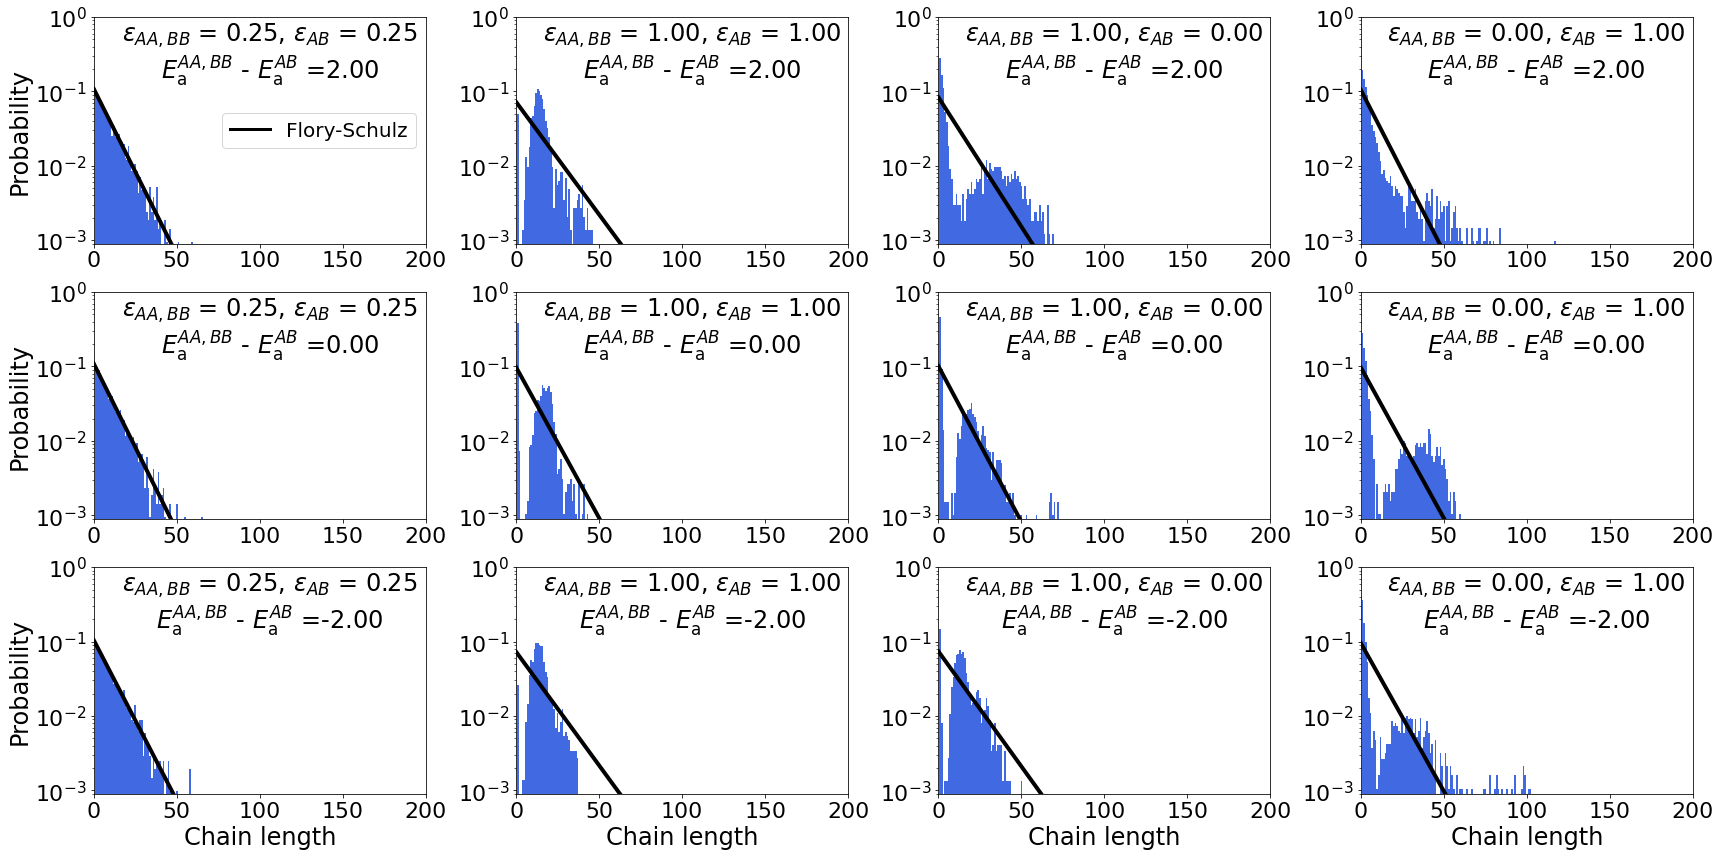

In [20]:
#Fig S6



c = 0   
fig,ax = plt.subplots(3,4, figsize =(24,12))


barwidth = 0.75
x_chain = np.linspace(0,100,101)

chainstiff = ['stiff']
shape = '<'
figlabel = ['a','b','c','d','e',
            'f','g','h','i','j',
            'k','l','m','n','o',
            'p','q','r','s','t',
            'u','v','w','x','y',
            'z']
max_chain= 10
maxchainlength = 400
n = np.linspace(0,maxchainlength-1,maxchainlength)




blockeAAcase = [['0.75','3.0','3.0','0.0','0.75','3.0','3.0','0.0','0.75','3.0','3.0','0.0']]
               
blockeBBcase = [['0.75','3.0','3.0','0.0','0.75','3.0','3.0','0.0','0.75','3.0','3.0','0.0']]
blockeABcase = [['0.75','3.0','0.0','3.0','0.75','3.0','0.0','3.0','0.75','3.0','0.0','3.0']
                ]
blockrbAAcase = [['9.0','9.0','9.0','9.0','9.0','9.0','9.0','9.0','3.0','3.0','3.0','3.0']]
               
blockrbBBcase = [['9.0','9.0','9.0','9.0','9.0','9.0','9.0','9.0','3.0','3.0','3.0','3.0']]
blockrbABcase = [['3.0','3.0','3.0','3.0','9.0','9.0','9.0','9.0','9.0','9.0','9.0','9.0']
                ]
figtrack = 0
trials = 3


for i in range(len(blockeAAcase)):#4 attraction case
        
    
        
        for e in range(len(blockrbAAcase[i])):
            if 0 <=e <=3:
                m = 0
                k = e
                xmax = 100
                barwidth = 1
            elif 4 <= e <=7 :
                m = 1
                k = e - 4
                xmax = 20
                barwidth = 1
            else :
                m = 2
                k = e - 8
                xmax = 20
                barwidth = 1
            
                
            Ea = e
            ChainTotal = np.zeros((maxchainlength))
            
           

            pAABB = []   
            allp = []
            for trial in range(trials): 
                simname = '220121_copoly_%sepsAA_%sepsAB_%sepsBB_%srbAA_%srbBB_%srbAB_%s-%i'%(blockeAAcase[i][e],
                                                                                              blockeABcase[i][e],
                                                                                               blockeBBcase[i][e],
                                                                                               blockrbAAcase[i][Ea], 
                                                                                             blockrbBBcase[i][Ea],
                                                                                             blockrbABcase[i][Ea],
                                                                                             chainstiff[c], trial+1)
        
                                                                                         
            
                
                    
                DeltaE = (float (blockrbAAcase[i][Ea]) - float(blockrbABcase[i][Ea]))/3
                
                

                with open('./alljarfile/'+simname+'_extent.pickle','rb') as f1:
                    p = pickle.load(f1)
                    allp.append(p[-1])
                with open('./alljarfile/'+simname+'_probs.pickle','rb') as f1:
                    probs = pickle.load(f1)
                    pAABB.append(probs[2][-1])



                with open('./alljarfile/'+simname+'_ChainDist.pickle','rb') as f1:
                    ChainDist = pickle.load(f1)


                
            
            
            
                
                for id, val in enumerate(ChainDist[0]):
                    ChainTotal[val] += ChainDist[1][id]

                
            ChainTotal /= trials
            p = np.mean(allp)
            eAA = float(blockeAAcase[i][e])/3
            eAB = float(blockeABcase[i][e])/3
            Aii = A[eAA]
            Aij = A[eAB]
            alpha = Aii/Aij
            
            predictedp = (alpha*(np.exp(-DeltaE)))/(alpha*np.exp(-DeltaE)+1)
            
            

            pAABB = predictedp

            Flory = (1 - p)*(p**(n-1))
            ax[m,k].plot(n,Flory, '-k', linewidth = 4)
            ax[m,k].bar(n,ChainTotal/np.sum(ChainTotal),width=barwidth,align='center', 
                            label = '$E_{a}^{AA,BB}$ = %.2f, $E_{a}^{AB}$ = %.2f'%(float(blockrbAAcase[i][Ea])/3,
                                                                                  float(blockrbABcase[i][Ea])/3),color = 'royalblue')
                
        

            
            ax[m,k].set_xlim((0,200))
            ax[m,k].set_ylim((9e-4,1))
            ax[m,k].set_yscale('log')
            ax[m,k].tick_params(axis='both', labelsize=22)
            ax[m,k].set_title('$\epsilon_{AA,BB}$ = %.2f, $\epsilon_{AB}$ = %.2f\n'%(float(blockeAAcase[i][e])/3,
                                                                                                                                   
                                         float(blockeABcase[i][e])/3)+r'$E_{\rm a}^{AA,BB}$ - $E_{\rm a}^{AB}$ =%.2f'%(
                                        (float(blockrbAAcase[i][e])/3-
                                        float(blockrbABcase[i][e])/3)) ,
                            x = 0.53, y = 0.7, fontsize = 24)
            
                                                                                                                                   

ax[2,0].set_xlabel('Chain length',fontsize = 24)
ax[2,1].set_xlabel('Chain length',fontsize = 24)
ax[2,2].set_xlabel('Chain length',fontsize = 24)
ax[2,3].set_xlabel('Chain length',fontsize = 24)

ax[0,0].set_ylabel('Probability',fontsize = 24)

ax[1,0].set_ylabel('Probability',fontsize = 24)
ax[2,0].set_ylabel('Probability',fontsize = 24)


line = Line2D([], [], 
                           linestyle='solid',color = 'black', 

                          label = 'Flory-Schulz', linewidth = 3
                         )
ax[0,0].legend(handles=[line],fontsize = 20, loc = 7)

fig.tight_layout()

#fig.savefig('Allchain_combine_stiff.png',bbox_inches='tight')  



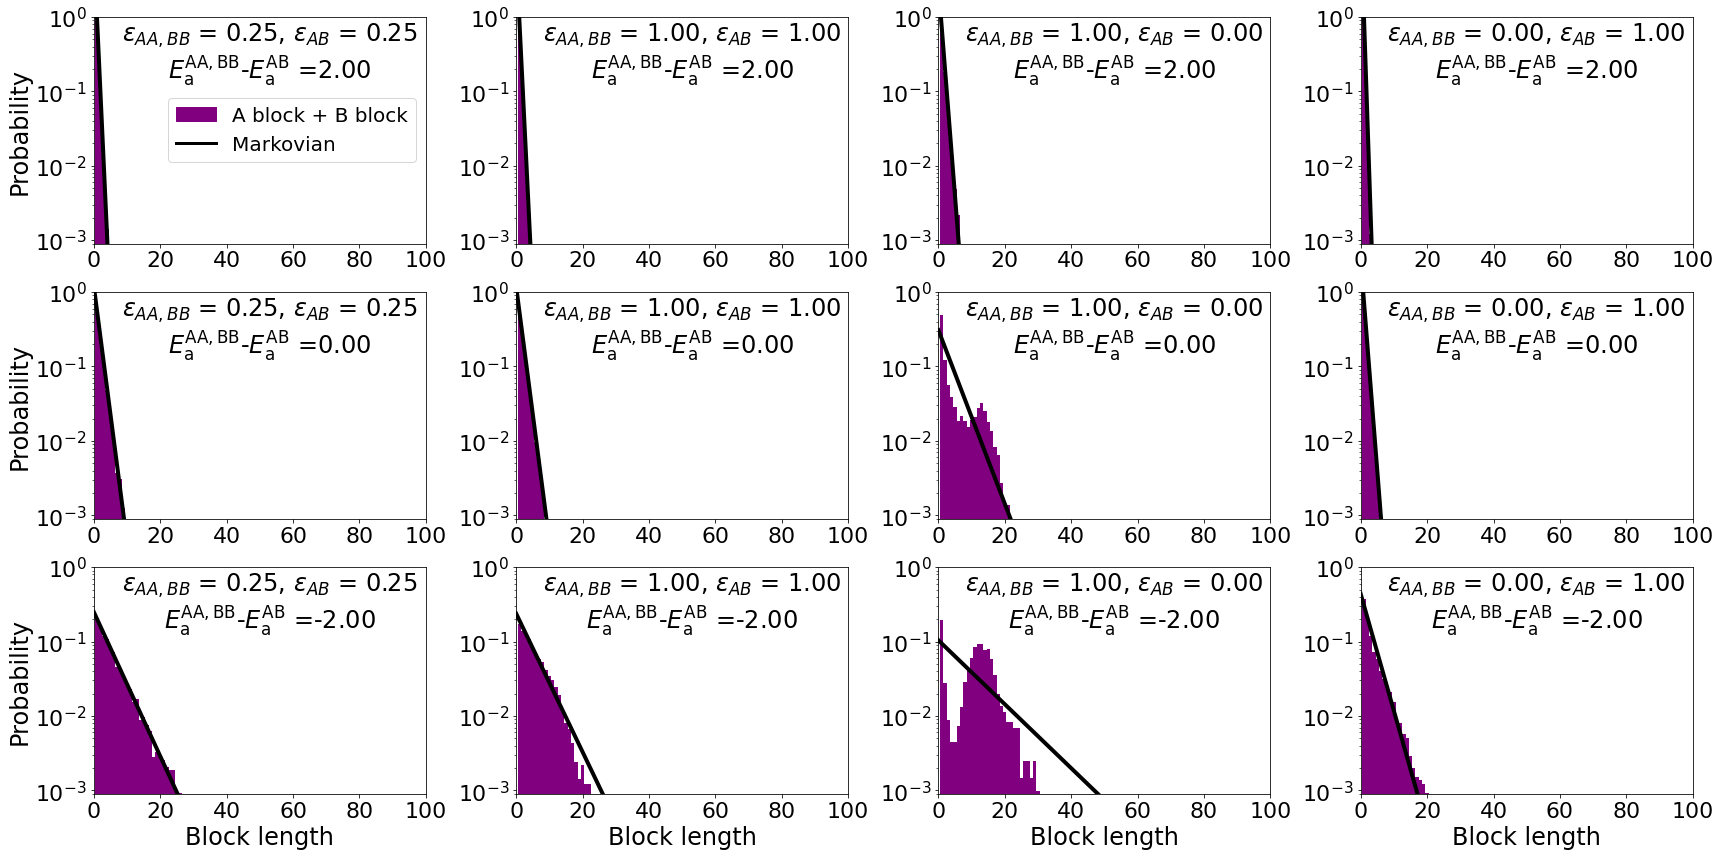

In [21]:
#Fig S7



c = 0   
fig,ax = plt.subplots(3,4, figsize =(24,12))


barwidth = 0.75
x_chain = np.linspace(0,100,101)

chainstiff = ['stiff']
shape = '<'
figlabel = ['a','b','c','d','e',
            'f','g','h','i','j',
            'k','l','m','n','o',
            'p','q','r','s','t',
            'u','v','w','x','y',
            'z']
max_chain= 10
maxchainlength = 400
maxblock = 400
n = np.linspace(0,maxblock-1,maxblock)




blockeAAcase = [['0.75','3.0','3.0','0.0','0.75','3.0','3.0','0.0','0.75','3.0','3.0','0.0']]
               
blockeBBcase = [['0.75','3.0','3.0','0.0','0.75','3.0','3.0','0.0','0.75','3.0','3.0','0.0']]
blockeABcase = [['0.75','3.0','0.0','3.0','0.75','3.0','0.0','3.0','0.75','3.0','0.0','3.0']
                ]
blockrbAAcase = [['9.0','9.0','9.0','9.0','9.0','9.0','9.0','9.0','3.0','3.0','3.0','3.0']]
               
blockrbBBcase = [['9.0','9.0','9.0','9.0','9.0','9.0','9.0','9.0','3.0','3.0','3.0','3.0']]
blockrbABcase = [['3.0','3.0','3.0','3.0','9.0','9.0','9.0','9.0','9.0','9.0','9.0','9.0']
                ]
figtrack = 0
trials = 3


for i in range(len(blockeAAcase)):#4 attraction case
        
    
        
        for e in range(len(blockrbAAcase[i])):
            if 0 <=e <=3:
                m = 0
                k = e
                xmax = 100
                barwidth = 1
            elif 4 <= e <=7 :
                m = 1
                k = e - 4
                xmax = 20
                barwidth = 1
            else :
                m = 2
                k = e - 8
                xmax = 20
                barwidth = 1
            
                
            Ea = e
            ChainTotal = np.zeros((maxchainlength))
            BlockTotal = np.zeros(maxblock)
            
           

            pAABB = []   
            allp = []
            for trial in range(trials): 
                #print(BlockTotal[20:30])
                simname = '220121_copoly_%sepsAA_%sepsAB_%sepsBB_%srbAA_%srbBB_%srbAB_%s-%i'%(blockeAAcase[i][e],
                                                                                              blockeABcase[i][e],
                                                                                               blockeBBcase[i][e],
                                                                                               blockrbAAcase[i][Ea], 
                                                                                             blockrbBBcase[i][Ea],
                                                                                             blockrbABcase[i][Ea],
                                                                                             chainstiff[c], trial+1)
        
                                                                                         
            
                
                    
                DeltaE = (float (blockrbAAcase[i][Ea]) - float(blockrbABcase[i][Ea]))/3
                
                
                

                with open('./alljarfile/'+simname+'_extent.pickle','rb') as f1:
                    p = pickle.load(f1)
                    allp.append(p[-1])
                with open('./alljarfile/'+simname+'_probs.pickle','rb') as f1:
                    probs = pickle.load(f1)
                    pAABB.append(probs[2][-1])



                with open('./alljarfile/'+simname+'_ChainDist.pickle','rb') as f1:
                    ChainDist = pickle.load(f1)


                
            
            
            
                
                
                with open('./alljarfile/'+simname+'_BlockA.pickle','rb') as f1:
                    BlockADist = pickle.load(f1)


                with open('./alljarfile/'+simname+'_BlockB.pickle','rb') as f1:
                    BlockBDist = pickle.load(f1)   
                for id, val in enumerate(BlockADist[0]):
                    BlockTotal[val] += BlockADist[1][id]

                for id, val in enumerate(BlockBDist[0]):
                    BlockTotal[val] += BlockBDist[1][id]
                    
               
                
            
            
            
                
                for id, val in enumerate(ChainDist[0]):
                    ChainTotal[val] += ChainDist[1][id]
            BlockTotal /= trials

            eAA = float(blockeAAcase[i][e])/3
            eAB = float(blockeABcase[i][e])/3
            
            p = np.mean(allp)
            Aii = A[eAA]
            Aij = A[eAB]
            alpha = Aii/Aij
            
            predictedp = (alpha*(np.exp(-DeltaE)))/(alpha*np.exp(-DeltaE)+1)

            pAABB = np.mean(pAABB)

            Markovian = (1 - p*pAABB)*(p*pAABB)**(n-1)
            ax[m,k].plot(n,Markovian, '-k', linewidth = 4)
            ax[m,k].bar(n,BlockTotal/np.sum(BlockTotal),width=barwidth,align='center', color = 'purple',
                            label = '$E_{a}^{AA,BB}$ = %.2f, $E_{a}^{AB}$ = %.2f'%(float(blockrbAAcase[i][Ea])/3,
                                                                                  float(blockrbABcase[i][Ea])/3))
                
        

            
            ax[m,k].set_xlim((0,100))
            ax[m,k].set_ylim((9e-4,1))
            ax[m,k].set_yscale('log')

            ax[m,k].tick_params(axis='both', labelsize=22)
            ax[m,k].set_title('$\epsilon_{AA,BB}$ = %.2f, $\epsilon_{AB}$ = %.2f\n'%(float(blockeAAcase[i][e])/3,
                                                                                                                                   
                                         float(blockeABcase[i][e])/3)+r'$E_{\rm a}^{\rm AA,BB}$-$E_{\rm a}^{\rm AB}$ =%.2f'%(
                                        float(blockrbAAcase[i][e])/3 -
                                        float(blockrbABcase[i][e])/3) ,
                            x = 0.53, y = 0.7, fontsize = 24)
            
                                                                                                                                   
                                         
                            
                                         

ax[2,0].set_xlabel('Block length',fontsize = 24)
ax[2,1].set_xlabel('Block length',fontsize = 24)
ax[2,2].set_xlabel('Block length',fontsize = 24)
ax[2,3].set_xlabel('Block length',fontsize = 24)

ax[0,0].set_ylabel('Probability',fontsize = 24)

ax[1,0].set_ylabel('Probability',fontsize = 24)
ax[2,0].set_ylabel('Probability',fontsize = 24)

red_patch = mpatches.Patch(color='purple', label='A block + B block')  
line = Line2D([], [], linestyle='solid',color = 'black', 

                          label = 'Markovian', linewidth = 3
                         )
ax[0,0].legend(handles=[red_patch,line],fontsize = 20, loc = 7)


fig.tight_layout()
 
#fig.savefig('Block_allcase_stiff.png',bbox_inches='tight')  


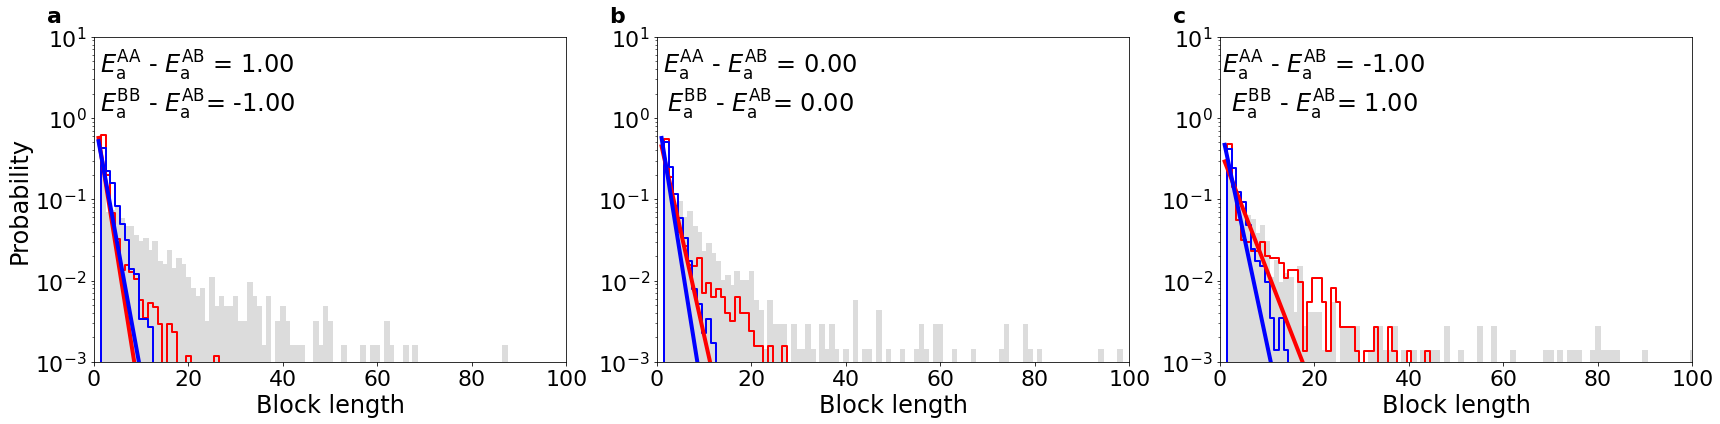

In [22]:
#Figure S8
c = 0   
fig,ax = plt.subplots(1,3, figsize =(24,6))

barwidth = 0.5
x_chain = np.linspace(0,100,101)

chainstiff = ['flex']
shape = '<'
figlabel = ['a','b','c','d','e',
            'f','g','h','i','j',
            'k','l','m','n','o',
            'p','q','r','s','t',
            'u','v','w','x','y',
            'z']
max_chain= 10
maxblock = 400
n = np.linspace(1,maxblock,maxblock)
blockeAAcase = [['3.0','3.0','3.0']]
               
blockeBBcase = [['0.3','0.3','0.3']]
blockeABcase = [['0.9','0.9','0.9']
                ]
blockrbAAcase = [['9.0','6.0','3.0']]
               
blockrbBBcase = [['3.0','6.0','9.0']]
blockrbABcase = [['6.0','6.0','6.0']
                ]
figtrack = 0
trials = 1
for i in range(len(blockeAAcase)):#4 attraction case
    for e in range(len(blockrbAAcase[i])): 
        Ea = e
        BlockTotalA = np.zeros((maxblock))
        BlockTotalB = np.zeros((maxblock))
        ChainTotal = np.zeros((maxblock))



        allprobsa = []
        allprobsb = []
        allp = []
        for trial in range(trials): 

            simname = '220121_copoly_%sepsAA_%sepsAB_%sepsBB_%srbAA_%srbBB_%srbAB_%s-%i'%(blockeAAcase[i][e],
                                                                                          blockeABcase[i][e],
                                                                                           blockeBBcase[i][e],
                                                                                           blockrbAAcase[i][Ea], 
                                                                                         blockrbBBcase[i][Ea],
                                                                                         blockrbABcase[i][Ea],
                                                                                         chainstiff[c], trial+1)





            DeltaE = (float (blockrbAAcase[i][Ea]) - float(blockrbABcase[i][Ea]))/3



            with open('./alljarfile/'+simname+'_extent.pickle','rb') as f1:
                p = pickle.load(f1)
                allp.append(p)
            with open('./alljarfile/'+simname+'_probs.pickle','rb') as f1:
                probs = pickle.load(f1)
                allprobsa.append(probs[0][-1])
                allprobsb.append(probs[1][-1])




            with open('./alljarfile/'+simname+'_BlockA.pickle','rb') as f1:
                BlockADist = pickle.load(f1)

            with open('./alljarfile/'+simname+'_BlockB.pickle','rb') as f1:
                BlockBDist = pickle.load(f1)




            for id, val in enumerate(BlockADist[0]):
                BlockTotalA[val] += BlockADist[1][id]

            for id, val in enumerate(BlockBDist[0]):
                BlockTotalB[val] += BlockBDist[1][id]
            with open('./alljarfile/'+simname+'_seqs.pickle','rb') as f1:
                seqs   = pickle.load(f1)
            with open('./alljarfile/'+simname+'_ChainDist.pickle','rb') as f1:
                ChainDist = pickle.load(f1)



            for id, val in enumerate(ChainDist[0]):
                ChainTotal[val] += ChainDist[1][id]


        p = np.mean(allp)   
        ChainTotal /= trials
        BlockTotalA /= trials
        BlockTotalB /= trials
        allprobsa = np.mean(allprobsa)
        allprobsb = np.mean(allprobsb)





        ax[e].step(n,BlockTotalA/np.sum(BlockTotalA),where='mid', color = 'red',linewidth = 2 ,
                        label = '$E_{a}^{AA,BB}$ = %.2f, $E_{a}^{AB}$ = %.2f'%(float(blockrbAAcase[i][Ea])/3,
                                                                              float(blockrbABcase[i][Ea])/3))
        ax[e].step(n,BlockTotalB/np.sum(BlockTotalB),where='mid', color = 'blue',linewidth = 2,
                        label = '$E_{a}^{AA,BB}$ = %.2f, $E_{a}^{AB}$ = %.2f'%(float(blockrbAAcase[i][Ea])/3,
                                                                              float(blockrbABcase[i][Ea])/3))



        Markoviana = (1-(p*2*allprobsa))*(p*2*allprobsa)**(n-1)
        Markovianb = (1-(p*2*allprobsb))*(p*2*allprobsb)**(n-1)


        ax[e].plot(n,Markoviana,'-k', color = 'red', linewidth = 4)
        ax[e].plot(n,Markovianb,'-k', color = 'blue', linewidth = 4)

        ax[e].set_xlim((0,50))
        ax[e].set_ylim((1e-3,1e1))
        ax[e].set_yscale('log')

        ax[e].set_xticks([0,20,40,60,80,100])
        ax[e].tick_params(axis='both', labelsize=22)

        ax[e].bar(n,ChainTotal/np.sum(ChainTotal),align = 'center', width = 1.2,color = 'gainsboro',
                        label = '$E_{a}^{AA,BB}$ = %.2f, $E_{a}^{AB}$ = %.2f'%(float(blockrbAAcase[i][Ea])/3,
                                                                              float(blockrbABcase[i][Ea])/3))
        ax[e].set_title(
                        '$E_\mathrm{a}^\mathrm{AA}$ - $E_\mathrm{a}^\mathrm{AB}$ = %.2f \n$E_\mathrm{a}^\mathrm{BB}$ - $E_\mathrm{a}^\mathrm{AB}$= %.2f'%(
                                    float(blockrbAAcase[i][e])/3-float(blockrbABcase[i][e])/3,float(blockrbBBcase[i][e])/3-float(blockrbABcase[i][e])/3
                                    ) ,
                        x = 0.22,y = 0.75, fontsize = 24)                                                                      
        ax[e].set_xlabel('Block length',fontsize = 24)
        ax[e].text(-10,15,figlabel[e],fontsize = 22, fontweight = 'bold')

                
                
                
                    
ax[0].set_ylabel('Probability',fontsize = 24)
red_patch = mpatches.Patch(color='red', label='A block')  
blue_patch = mpatches.Patch(color='blue', label='B block')  
line1 = Line2D([], [], 
               linestyle='solid',color = 'red', 
              
              label = 'Markovian - A block'
             )
line2 = Line2D([], [], 
               linestyle='solid',color = 'blue', 
              
              label = 'Markovian - B block'
             )

fig.tight_layout()

#fig.savefig('AllBlock_selective_flex.png',bbox_inches='tight')  
